In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import warnings
import sklearn
import random

from scipy import stats
from scipy.stats import mannwhitneyu
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import t



In [5580]:
N_number = 12388176
N_number

12388176

In [5592]:
np.random.seed(N_number)

# Loading data

In [5593]:
df_art = pd.read_csv('theArt.csv')
df_art

,Number,Artist,Title,Style,Year,"Source (1 = classical, 2 = modern, 3 = nonhuman)","computerOrAnimal (0 = human, 1 = computer, 2 = animal)","Intent (0 = no, 1 = yes)"
0,1,Durer,Self-Portrait,Northern Renaissance,1500,1,0,1
1,2,de Vinci,Mona Lisa,Renaissance,1503,1,0,1
2,3,Michelangelo,The Creation of Adam,Italian Renaissance,1512,1,0,1
3,4,Bruegel,Tower of Babel,Dutch and Flemish Renaissance,1563,1,0,1
4,5,Hals,Laughing Cavalier,Baroque,1624,1,0,1
...,...,...,...,...,...,...,...,...
86,87,Turtle,Untitled,Abstract,2017,3,2,0
87,88,Snake,Untitled,Abstract,2017,3,2,0
88,89,Hippo,Untitled,Abstract,2017,3,2,0
89,90,Rhino,Untitled,Abstract,2017,3,2,0


In [5595]:
df_user = pd.read_csv('theData.csv',header = None)
df_user

,0,1,2,3,4,5,6,7,8,9,...,211,212,213,214,215,216,217,218,219,220
0,7,6,2,6,3,3,5,4,6,6,...,5.0,2.0,3.0,4.0,19.0,2.0,3.0,0.0,2.0,2.0
1,6,6,5,6,5,5,4,6,2,5,...,4.0,3.0,2.0,4.0,20.0,1.0,6.0,1.0,3.0,1.0
2,7,6,6,6,5,6,7,6,5,5,...,4.0,1.0,2.0,2.0,18.0,2.0,2.0,1.0,1.0,2.0
3,6,6,5,7,6,5,4,6,6,6,...,5.0,3.0,5.0,4.0,21.0,2.0,5.0,1.0,3.0,0.0
4,7,5,5,5,6,5,5,7,6,7,...,3.0,4.0,3.0,3.0,22.0,1.0,3.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,7,7,7,7,7,7,7,7,7,7,...,1.0,3.0,3.0,4.0,20.0,1.0,3.0,1.0,1.0,2.0
296,4,5,6,6,4,3,4,6,4,6,...,3.0,3.0,3.0,3.0,21.0,1.0,2.0,2.0,2.0,1.0
297,7,6,5,2,5,6,6,5,5,7,...,4.0,1.0,2.0,2.0,19.0,1.0,2.0,2.0,0.0,2.0
298,7,4,4,6,4,5,5,2,7,2,...,2.0,1.0,3.0,1.0,19.0,2.0,2.0,2.0,2.0,1.0


# 1

Is classical art more well liked than modern art?


Columns 1-91: Preference ratings (liking) of the 91 art pieces. The column number in this file corresponds to the number of the art piece in column 1 of “theArt.csv” file described above. For instance, ratings of art piece 27 (“the woman at the window”) is in column 27. Numbers represent preference ratings from 1 (“hate it”) to 7 (“love it”).
Columns 92-182: “Energy” ratings of the same 91 art pieces (in the same order as the preference ratings above). Numbers represent ratings from 1 (“it calms me down a lot”) to 7 (“it agitates me a lot”).

In [5597]:
df_classical = df_art[df_art['Source (1 = classical, 2 = modern, 3 = nonhuman)'] == 1]
df_classical.shape

(35, 8)

In [5598]:
df_modern = df_art[df_art['Source (1 = classical, 2 = modern, 3 = nonhuman)'] == 2]
df_modern.shape

(35, 8)

In [5599]:
df_nonhuman = df_art[df_art['Source (1 = classical, 2 = modern, 3 = nonhuman)'] == 3]
df_nonhuman.shape

(21, 8)

In [5600]:
## df_modern from Number 36-70
## df_clasical from Number 1- 35

In [5601]:
df_preferratings = df_user.iloc[:,:91]
df_preferratings

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,7,6,2,6,3,3,5,4,6,6,...,1,2,2,1,2,1,1,5,5,2
1,6,6,5,6,5,5,4,6,2,5,...,3,5,3,2,3,6,1,4,2,5
2,7,6,6,6,5,6,7,6,5,5,...,4,4,7,6,3,4,4,5,4,4
3,6,6,5,7,6,5,4,6,6,6,...,5,5,6,4,2,4,4,4,3,5
4,7,5,5,5,6,5,5,7,6,7,...,4,1,4,2,5,4,2,4,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,7,7,7,7,7,7,7,7,7,7,...,3,3,4,4,3,4,2,3,4,2
296,4,5,6,6,4,3,4,6,4,6,...,1,3,7,4,4,1,4,6,4,3
297,7,6,5,2,5,6,6,5,5,7,...,2,3,6,2,3,2,2,6,6,2
298,7,4,4,6,4,5,5,2,7,2,...,2,4,4,4,5,4,6,6,4,5


In [5602]:
df_ratings_classcial = df_preferratings.iloc[:,0:35]
df_ratings_modern =  df_preferratings.iloc[:,35:70]

In [5603]:
df_ratings_classcial.mean().mean()

4.741523809523809

In [5604]:
df_ratings_modern.mean().mean()

4.25657142857143

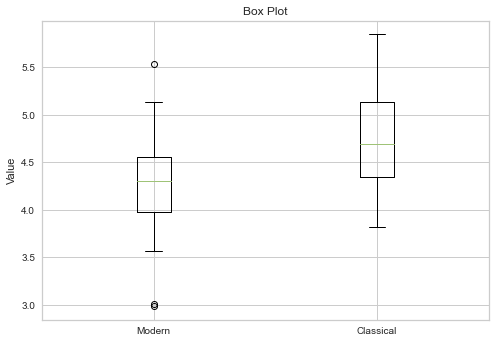

In [5605]:
data = [df_ratings_modern.mean(), df_ratings_classcial.mean()]
fig, ax = plt.subplots()
ax.boxplot(data)

ax.set_xticklabels(["Modern", "Classical"])
ax.set_ylabel("Value")
ax.set_title("Box Plot");

In [5606]:
statistic, p_value = mannwhitneyu(df_ratings_classcial.mean(), df_ratings_modern.mean(), alternative="greater")

print("Mann-Whitney U statistic:", statistic)
print("p-value:", p_value)

Mann-Whitney U statistic: 894.0
p-value: 0.0004821535287250196


Since the p-value is so small, the difference between the modern and classical artpiece's (specifically the means of each artpiece) is too large to be reasonably consistent with chance. 

## so classical art is more well liked than modern art.

In [5607]:
df_mean_modern =  df_ratings_modern.mean().to_frame('mean_modern')
df_mean_classical =  df_ratings_classcial.mean().to_frame('mean_class')
df_mean_modern = df_mean_modern.reset_index(drop = True)
df_mean_classical = df_mean_classical.reset_index(drop = True)

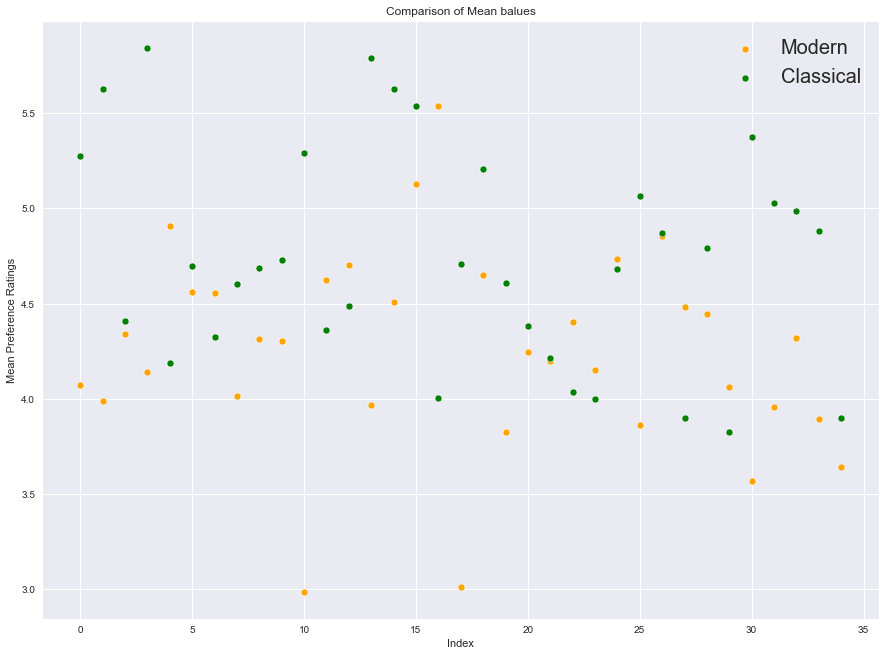

In [5608]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(15, 11))

sns.scatterplot(data=df_mean_modern, x=df_mean_modern.index, y="mean_modern", color="orange")
sns.scatterplot(data=df_mean_classical, x=df_mean_modern.index, y="mean_class", color="green")

ax.set_xlabel('Index')
ax.set_ylabel('Mean Preference Ratings')
ax.set_title('Comparison of Mean balues')
plt.legend(labels=['Modern', 'Classical'],fontsize=20)
plt.show()

Thee average ratings for the overall 35 classical artpieces is higher than the average ratings for 35 modern artpieces. 
Also, we can see from the plot that classical green dots are comparatively locatedd in a higher position than modern yellow dots.
So, I think the classical art is more well liked than modern art.

# 2 Is there a difference in the preference ratings for modern art vs. non-human (animals and computers) generated art?

In [5609]:
df_ratings_nonhuman = df_preferratings.iloc[:,70:]
df_ratings_nonhuman

,70,71,72,73,74,75,76,77,78,79,...,81,82,83,84,85,86,87,88,89,90
0,2,1,3,5,2,3,5,3,2,2,...,1,2,2,1,2,1,1,5,5,2
1,2,2,2,4,2,2,2,3,2,2,...,3,5,3,2,3,6,1,4,2,5
2,4,4,4,4,6,4,6,3,4,4,...,4,4,7,6,3,4,4,5,4,4
3,1,2,5,5,4,5,4,2,4,2,...,5,5,6,4,2,4,4,4,3,5
4,1,1,2,4,2,2,3,2,1,2,...,4,1,4,2,5,4,2,4,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2,2,4,2,2,2,4,2,2,3,...,3,3,4,4,3,4,2,3,4,2
296,3,4,4,4,4,4,4,1,1,4,...,1,3,7,4,4,1,4,6,4,3
297,5,1,2,1,5,2,5,2,3,6,...,2,3,6,2,3,2,2,6,6,2
298,3,3,5,5,6,4,4,5,3,6,...,2,4,4,4,5,4,6,6,4,5


In [5610]:
if df_ratings_nonhuman.mean().mean() == df_ratings_modern.mean().mean():
    print('No, they have the same mean.')
else:
    print('Yes, they have the different means')

Yes, they have the different means


In [5611]:
if df_ratings_nonhuman.mean().std() == df_ratings_modern.mean().std():
    print('No, they have the same standard deviation.')
else:
    print('Yes, they have the different standard deviations')

Yes, they have the different standard deviations


In [5612]:
## check  pvalue

In [5613]:
statistic, p_value = mannwhitneyu(df_ratings_nonhuman.mean(), df_ratings_modern.mean())
print("Mann-Whitney U statistic:", statistic)
print("p-value:", p_value)

Mann-Whitney U statistic: 91.0
p-value: 2.995997764824167e-06


Since the p-value is so small, the difference between the modern and nonhuman artpiece's (specifically the means of each artpiece) is too large to be reasonably consistent with chance. 

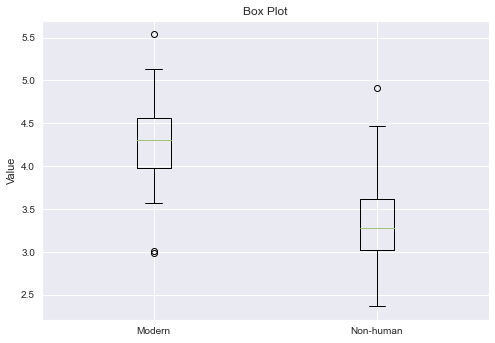

In [5614]:
data = [df_ratings_modern.mean(),df_ratings_nonhuman.mean()]
fig, ax = plt.subplots()
ax.boxplot(data)

ax.set_xticklabels(["Modern", "Non-human"])
ax.set_ylabel("Value")
ax.set_title("Box Plot");

In [5615]:
## make a plot to visualize their distribution

In [5616]:
df_mean_nonhuman = df_ratings_nonhuman.mean().to_frame("mean_nonhuman")
df_mean_nonhuman = df_mean_nonhuman.reset_index(drop = True)

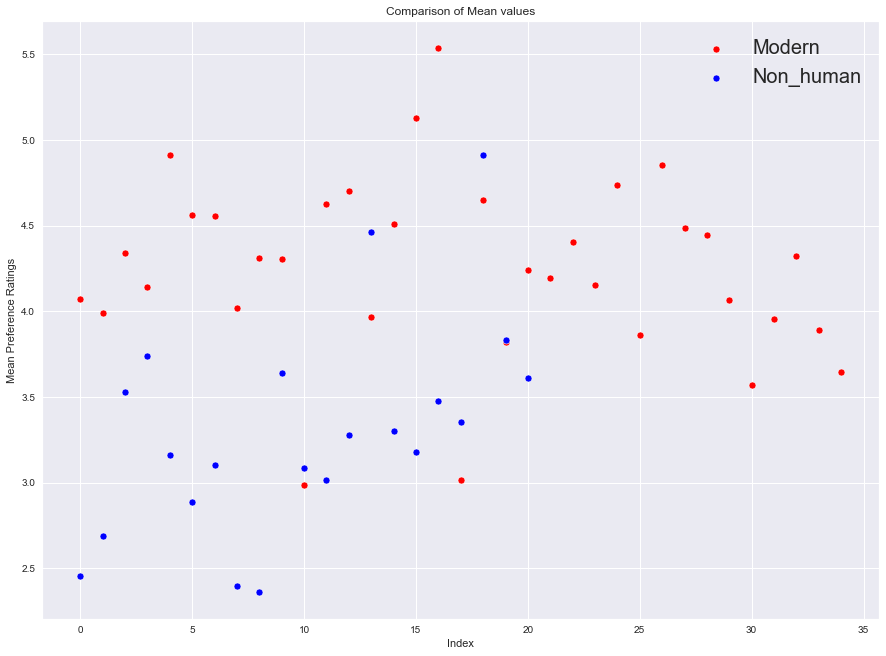

In [5617]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(15, 11))

sns.scatterplot(data=df_mean_modern, x=df_mean_modern.index, y="mean_modern", color="red")
sns.scatterplot(data=df_mean_nonhuman, x=df_mean_nonhuman.index, y="mean_nonhuman", color="blue")

ax.set_xlabel('Index')
ax.set_ylabel('Mean Preference Ratings')
ax.set_title('Comparison of Mean values')
plt.legend(labels=['Modern', 'Non_human'],fontsize=20)
plt.show()

From the plot we can see that modern art piece's average preference ratings is comparatively higher than non_human, and also the data points are. comparatively more compact. So it further verifies our conclusion that they should be different

# 3. Do women give higher art preference ratings than men?

colindex 216 represents gender
if 1 then male, if 2 then female, if 3 then non-binary

In [5618]:
df_gender = df_user.iloc[:,216]
df_gender.dtype

dtype('float64')

In [5619]:
df_gender_frame = df_gender.to_frame('Gender')

In [5620]:
## 20 users does not clarify their genders.
nan_rows = df_gender_frame[df_gender_frame.isna().any(axis=1)]
nan_rows.shape

(20, 1)

In [5621]:
## so focus on users who already declared

In [5622]:
Male = df_gender[df_user[216] == 1].to_frame('Male')
Male

,Male
1,1.0
4,1.0
16,1.0
25,1.0
26,1.0
...,...
293,1.0
295,1.0
296,1.0
297,1.0


In [5623]:
Female = df_gender[df_user[216] == 2].to_frame('Female')
Female

,Female
0,2.0
2,2.0
3,2.0
5,2.0
6,2.0
...,...
289,2.0
290,2.0
291,2.0
294,2.0


In [5624]:
Non_binary = df_gender[df_user[216] == 3].to_frame('Non-binary')
Non_binary

,Non-binary
24,3.0
57,3.0
81,3.0
129,3.0
162,3.0
282,3.0


In [5625]:
df_male_users = df_user.iloc[Male.index]
df_male_users = df_male_users.iloc[:,0:91]
df_male_users

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
1,6,6,5,6,5,5,4,6,2,5,...,3,5,3,2,3,6,1,4,2,5
4,7,5,5,5,6,5,5,7,6,7,...,4,1,4,2,5,4,2,4,6,3
16,6,6,5,6,5,6,5,6,5,5,...,2,5,6,3,2,3,3,3,4,2
25,7,7,6,6,5,7,6,7,7,7,...,2,4,4,1,1,2,3,3,2,2
26,5,6,4,7,4,4,6,4,5,5,...,3,2,5,4,2,4,3,4,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,5,6,5,5,5,6,6,6,5,6,...,6,4,5,5,5,5,5,5,5,4
295,7,7,7,7,7,7,7,7,7,7,...,3,3,4,4,3,4,2,3,4,2
296,4,5,6,6,4,3,4,6,4,6,...,1,3,7,4,4,1,4,6,4,3
297,7,6,5,2,5,6,6,5,5,7,...,2,3,6,2,3,2,2,6,6,2


In [5626]:
df_female_users = df_user.iloc[Female.index]
df_female_users = df_female_users.iloc[:,0:91]
df_female_users

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,7,6,2,6,3,3,5,4,6,6,...,1,2,2,1,2,1,1,5,5,2
2,7,6,6,6,5,6,7,6,5,5,...,4,4,7,6,3,4,4,5,4,4
3,6,6,5,7,6,5,4,6,6,6,...,5,5,6,4,2,4,4,4,3,5
5,5,5,5,6,4,5,4,5,4,5,...,2,4,3,4,4,3,3,5,5,2
6,4,5,4,7,4,6,6,5,6,4,...,2,1,5,3,3,4,4,6,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,6,6,6,7,5,6,3,5,5,6,...,3,5,6,3,2,3,3,3,3,5
290,5,3,4,5,4,5,5,5,5,5,...,2,5,5,3,3,2,5,5,3,5
291,6,6,4,7,4,5,4,3,4,2,...,5,7,5,1,2,1,4,7,1,1
294,5,7,7,7,4,5,5,6,4,7,...,1,1,2,1,1,1,1,4,4,5


In [5627]:
print(df_male_users.mean().mean())
print(df_female_users.mean().mean())

4.21445922498554
4.225735158696052


In [5628]:
## check pure stats
if df_female_users.mean().mean() > df_male_users.mean().mean():
    print("Yes, female users' ratings are higher than male users based on overall means.")
else:
    print('No, ratings of male users are higher based on overall means .')

Yes, female users' ratings are higher than male users based on overall means.


In [5629]:
## but such small difference might due to chance a lot.
## use utest

In [5630]:
statistic, p_value = mannwhitneyu(df_female_users.mean(), df_male_users.mean(),alternative = 'greater')
print("Mann-Whitney U statistic:", statistic)
print("p-value:", p_value)

Mann-Whitney U statistic: 4172.0
p-value: 0.46524242732663146


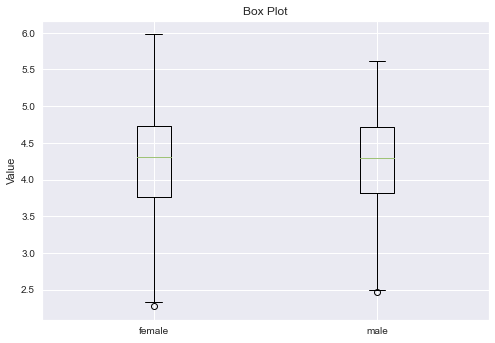

In [5631]:
data = [df_female_users.mean(),df_male_users.mean()]
fig, ax = plt.subplots()
ax.boxplot(data)

ax.set_xticklabels(["female", "male"])
ax.set_ylabel("Value")
ax.set_title("Box Plot");

This p-value is much greater than alpha 0.05 (close to 1 almost). Thus, it shows that the difference between in the preference ratings of female and male users is highly due to chance. 

# so female users' ratings is not higher than males'

In [5632]:
## Still, we can make scatterplot to more visually see the difference

In [5633]:
df_mean_male =  df_male_users.mean().to_frame('mean_male')
df_mean_male = df_mean_male.reset_index(drop = True)
df_mean_female =  df_female_users.mean().to_frame('mean_female')
df_mean_female = df_mean_female.reset_index(drop = True)

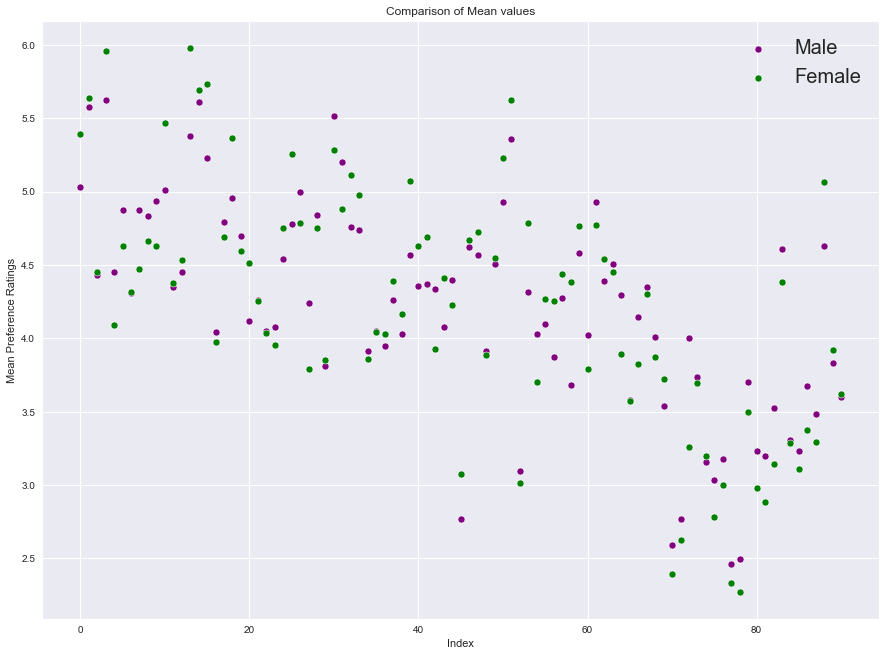

In [5634]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(15, 11))

sns.scatterplot(data=df_mean_male, x=df_mean_male.index, y="mean_male", color="Purple")

sns.scatterplot(data=df_mean_female, x=df_mean_female.index, y="mean_female", color="Green")

ax.set_xlabel('Index')
ax.set_ylabel('Mean Preference Ratings')
ax.set_title('Comparison of Mean values')
plt.legend(labels=['Male', 'Female'],fontsize=20)
plt.show()

So, eventhough female users' average rating is slightly higher than male users' average ratings (also with a higher standard deviation), We cannot see a big divergence in the pattern of datasets. And it might be caused by chance alone.


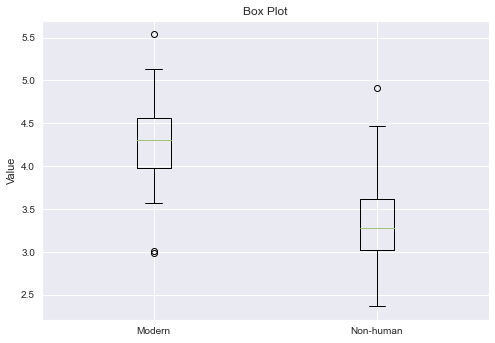

In [5635]:
data = [df_ratings_modern.mean(),df_ratings_nonhuman.mean()]
fig, ax = plt.subplots()
ax.boxplot(data)

ax.set_xticklabels(["Modern", "Non-human"])
ax.set_ylabel("Value")
ax.set_title("Box Plot");

# 4 Is there a difference in the preference ratings of users with some art background (some art education) vs. none?

In [5636]:
## Art education is col 219, so index is #218

In [5637]:
df_user.iloc[:,218].values

array([ 0.,  1.,  1.,  1.,  0.,  0.,  2.,  1.,  0.,  0.,  0.,  2.,  3.,
        3.,  0.,  3.,  1.,  1.,  2.,  0.,  0.,  2.,  3.,  0.,  1.,  1.,
        1.,  3.,  3.,  1.,  2.,  2.,  1.,  0., nan,  1., nan,  1., nan,
        0.,  1.,  2.,  3.,  0.,  3.,  1.,  3.,  2.,  0.,  2.,  1.,  2.,
        0.,  1.,  3.,  0.,  1.,  2.,  3.,  0.,  3., nan,  1.,  2.,  3.,
        3.,  0.,  1.,  0.,  2.,  2.,  0.,  2.,  0.,  1.,  0.,  2.,  1.,
        1.,  3.,  0.,  3.,  1.,  2.,  1., nan,  0.,  3.,  1.,  2.,  0.,
        0., nan,  1.,  0.,  1.,  1.,  0.,  3.,  1.,  2.,  0.,  0.,  2.,
        0., nan,  0., nan,  1.,  0.,  0.,  1.,  3.,  2.,  0.,  0.,  1.,
        0.,  1.,  0.,  3.,  0.,  3.,  0.,  0.,  0.,  1., nan,  0.,  1.,
       nan,  1.,  3.,  0.,  2., nan,  1.,  1.,  2.,  0.,  2.,  2.,  1.,
        0.,  3.,  1.,  1.,  2.,  0.,  2.,  1.,  1.,  0.,  1.,  2.,  0.,
        2.,  0.,  0.,  3.,  0.,  1.,  0.,  1.,  2.,  0.,  0.,  0.,  3.,
        1.,  1.,  3.,  0.,  0.,  1.,  2.,  3.,  0.,  1., nan,  3

In [5638]:
## so there contains some nan value in the art eduction data of users.

In [5639]:
## I consider the value type 0 as "none" and all the other 3 types of values(1,2,3) as "some".

In [5640]:
df_user_artbg = df_user.iloc[:,218].to_frame('artbackgroundyears')
df_user_artbg

,artbackgroundyears
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0
...,...
295,1.0
296,2.0
297,2.0
298,2.0


In [5641]:
## Select the well classified dataset for none
df_user_artbg_none = df_user_artbg[df_user_artbg.artbackgroundyears == 0.0]
df_user_artbg_none.shape

(92, 1)

In [5642]:
## Select the well classified dataset for some
df_user_artbg_some = df_user_artbg[df_user_artbg.artbackgroundyears.isin([1,2,3])]
df_user_artbg_some.shape

(188, 1)

In [5643]:
## check nan
nan_rows = df_user_artbg[df_user_artbg.isna().any(axis=1)]
nan_rows.shape

(20, 1)

In [5644]:
## dataset for "None"
df_none_artbg_users = df_user.iloc[df_user_artbg_none.index]
df_none_artbg_users = df_none_artbg_users.iloc[:,0:91]
df_none_artbg_users = df_none_artbg_users.dropna()
df_none_artbg_users

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,7,6,2,6,3,3,5,4,6,6,...,1,2,2,1,2,1,1,5,5,2
4,7,5,5,5,6,5,5,7,6,7,...,4,1,4,2,5,4,2,4,6,3
5,5,5,5,6,4,5,4,5,4,5,...,2,4,3,4,4,3,3,5,5,2
8,4,4,4,4,4,4,4,4,4,4,...,3,1,4,4,2,4,4,6,5,4
9,1,6,1,7,1,1,5,4,6,1,...,1,6,7,4,4,6,7,6,6,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,7,7,7,7,6,7,7,2,3,7,...,7,2,5,6,7,7,2,7,6,7
288,3,6,2,7,2,5,2,5,4,3,...,5,7,7,7,5,7,6,6,7,7
289,6,6,6,7,5,6,3,5,5,6,...,3,5,6,3,2,3,3,3,3,5
291,6,6,4,7,4,5,4,3,4,2,...,5,7,5,1,2,1,4,7,1,1


In [5645]:
## dataset for "some"
df_some_artbg_users = df_user.iloc[df_user_artbg_some.index]
df_some_artbg_users = df_some_artbg_users.iloc[:,0:91]
df_some_artbg_users = df_some_artbg_users.dropna()
df_some_artbg_users

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
1,6,6,5,6,5,5,4,6,2,5,...,3,5,3,2,3,6,1,4,2,5
2,7,6,6,6,5,6,7,6,5,5,...,4,4,7,6,3,4,4,5,4,4
3,6,6,5,7,6,5,4,6,6,6,...,5,5,6,4,2,4,4,4,3,5
6,4,5,4,7,4,6,6,5,6,4,...,2,1,5,3,3,4,4,6,4,4
7,6,6,6,7,6,6,4,3,6,6,...,2,3,5,1,1,1,1,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,7,7,7,7,7,7,7,7,7,7,...,3,3,4,4,3,4,2,3,4,2
296,4,5,6,6,4,3,4,6,4,6,...,1,3,7,4,4,1,4,6,4,3
297,7,6,5,2,5,6,6,5,5,7,...,2,3,6,2,3,2,2,6,6,2
298,7,4,4,6,4,5,5,2,7,2,...,2,4,4,4,5,4,6,6,4,5


In [5646]:
## u-TEST

In [5647]:
statistic, p_value = mannwhitneyu(df_some_artbg_users.mean(), df_none_artbg_users.mean())
print("Mann-Whitney U statistic:", statistic)
print("p-value:", p_value)

Mann-Whitney U statistic: 3790.0
p-value: 0.32466859074625565


This p-value is much greater than alpha 0.05. Thus, it shows that the difference between in the preference ratings of users with some art background (some art education) vs. none is highly due to chance. 

In [5648]:
## to check their distribution

In [5649]:
df_mean_somebg = df_some_artbg_users.mean().to_frame('Some_bg')
df_mean_nonebg = df_none_artbg_users.mean().to_frame('no_bg')

In [5650]:
## reset two df's index to make plots
df_mean_somebg = df_mean_somebg.reset_index()
df_mean_nonebg = df_mean_nonebg.reset_index()


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


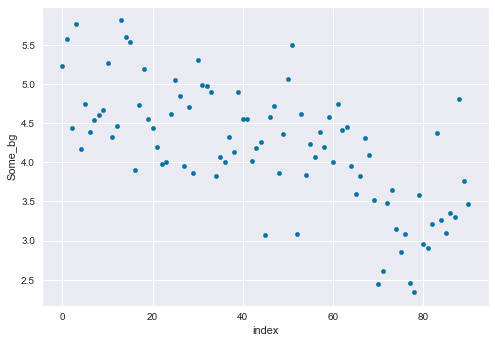

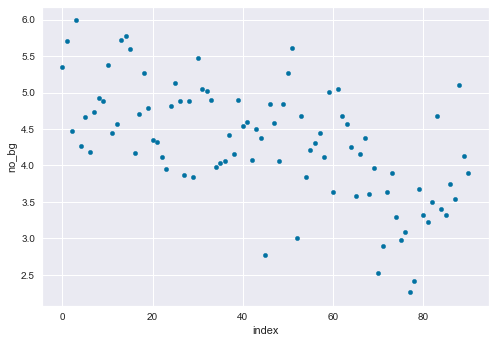

In [5651]:
df_mean_somebg.plot.scatter(x = 'index', y='Some_bg');
df_mean_nonebg.plot.scatter(x = 'index', y='no_bg');

# Show the plot

We can see from the graph that it's true that the mean of these two groups has some slightly different, the distribition and overall pattern of these two groups' average ratings toward the 91 artpieces are quite similar. So the difference might due to chance alone.

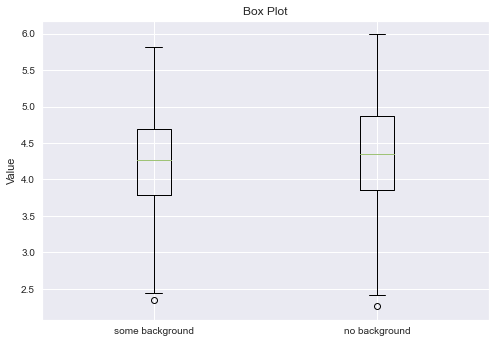

In [5652]:
data = [df_some_artbg_users.mean(),df_none_artbg_users.mean()]
fig, ax = plt.subplots()
ax.boxplot(data)

ax.set_xticklabels(["some background", "no background"])
ax.set_ylabel("Value")
ax.set_title("Box Plot");

# 5 Build a regression model to predict art preference ratings from energy ratings only. Make sure to use cross-validation methods to avoid overfitting and characterize how well your model predicts art preference ratings.

In [5653]:
df_user

,0,1,2,3,4,5,6,7,8,9,...,211,212,213,214,215,216,217,218,219,220
0,7,6,2,6,3,3,5,4,6,6,...,5.0,2.0,3.0,4.0,19.0,2.0,3.0,0.0,2.0,2.0
1,6,6,5,6,5,5,4,6,2,5,...,4.0,3.0,2.0,4.0,20.0,1.0,6.0,1.0,3.0,1.0
2,7,6,6,6,5,6,7,6,5,5,...,4.0,1.0,2.0,2.0,18.0,2.0,2.0,1.0,1.0,2.0
3,6,6,5,7,6,5,4,6,6,6,...,5.0,3.0,5.0,4.0,21.0,2.0,5.0,1.0,3.0,0.0
4,7,5,5,5,6,5,5,7,6,7,...,3.0,4.0,3.0,3.0,22.0,1.0,3.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,7,7,7,7,7,7,7,7,7,7,...,1.0,3.0,3.0,4.0,20.0,1.0,3.0,1.0,1.0,2.0
296,4,5,6,6,4,3,4,6,4,6,...,3.0,3.0,3.0,3.0,21.0,1.0,2.0,2.0,2.0,1.0
297,7,6,5,2,5,6,6,5,5,7,...,4.0,1.0,2.0,2.0,19.0,1.0,2.0,2.0,0.0,2.0
298,7,4,4,6,4,5,5,2,7,2,...,2.0,1.0,3.0,1.0,19.0,2.0,2.0,2.0,2.0,1.0


In [5654]:
## Columns 1-91: Preference ratings 
## Columns 92-182: “Energy” ratings

In [5655]:
df_preferratings

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,7,6,2,6,3,3,5,4,6,6,...,1,2,2,1,2,1,1,5,5,2
1,6,6,5,6,5,5,4,6,2,5,...,3,5,3,2,3,6,1,4,2,5
2,7,6,6,6,5,6,7,6,5,5,...,4,4,7,6,3,4,4,5,4,4
3,6,6,5,7,6,5,4,6,6,6,...,5,5,6,4,2,4,4,4,3,5
4,7,5,5,5,6,5,5,7,6,7,...,4,1,4,2,5,4,2,4,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,7,7,7,7,7,7,7,7,7,7,...,3,3,4,4,3,4,2,3,4,2
296,4,5,6,6,4,3,4,6,4,6,...,1,3,7,4,4,1,4,6,4,3
297,7,6,5,2,5,6,6,5,5,7,...,2,3,6,2,3,2,2,6,6,2
298,7,4,4,6,4,5,5,2,7,2,...,2,4,4,4,5,4,6,6,4,5


In [5656]:
df_user_energe = df_user.iloc[:,91:182]
df_user_energe


,91,92,93,94,95,96,97,98,99,100,...,172,173,174,175,176,177,178,179,180,181
0,5,3,4,3,4,4,4,5,5,5,...,4,4,3,4,4,4,4,3,6,4
1,5,2,3,5,5,5,5,7,4,6,...,6,5,3,4,4,3,2,3,5,5
2,4,3,4,3,4,4,4,4,4,4,...,4,4,2,4,4,4,4,4,4,4
3,2,3,3,6,4,4,4,5,5,6,...,5,3,5,5,4,4,5,5,5,4
4,7,5,4,5,4,5,4,7,4,6,...,3,1,5,2,4,1,1,4,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,7,5,4,5,1,7,4,7,7,7,...,4,5,5,4,5,4,6,4,5,4
296,4,5,4,6,4,4,4,4,5,4,...,4,4,7,4,3,4,4,4,4,4
297,3,7,3,2,4,6,4,6,7,6,...,6,5,1,4,5,3,5,1,6,2
298,3,4,4,6,4,6,2,6,7,5,...,7,4,2,4,5,4,6,6,4,3


In [5657]:
## need to do cross validation

In [5658]:
X_data = df_user_energe.values
Y_data = df_preferratings.values

In [5659]:
N_number

12388176

In [5660]:
## use k-folder cross validation
k = 7
kf = KFold(n_splits=k, shuffle =True, random_state= N_number)
kf.split(df_user)

<generator object _BaseKFold.split at 0x7fe999e5f5f0>

In [5661]:
## Use MSE
mse_scores = []
#Use LR
model = LinearRegression()

In [5662]:
X_train

,0,1,2,216,artbackgroundyears,artist_myself,general_opera,image1,image2,action1,action2,action3,dark1,dark2,dark3
206,-0.349981,-0.772906,-1.117239,1.0,1.0,0.0,1.0,-2.456858,0.378695,3.049152,0.889367,-0.254754,-0.737127,-2.288111,-1.711769
40,1.320338,0.828342,-0.320074,2.0,1.0,3.0,0.0,2.258591,-0.128451,0.359785,2.821331,-0.408685,-0.791066,1.349396,0.919242
252,-0.232766,-0.462987,-0.320074,2.0,1.0,1.0,2.0,2.022053,-0.117967,0.784625,-0.665410,-0.995411,0.867570,-0.205357,0.331175
166,-0.174158,-0.325245,0.477091,2.0,0.0,3.0,1.0,1.384104,-1.433735,-1.068782,0.680377,0.740639,-1.240711,-0.914971,-0.555809
260,2.609707,1.052173,0.477091,2.0,2.0,3.0,1.0,-4.348950,0.495047,0.741224,0.638618,0.026333,-1.594367,1.151650,0.475863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,-0.144854,-0.118633,-1.117239,2.0,3.0,2.0,2.0,0.374329,-0.105994,2.433516,1.003221,-0.500885,3.775848,-0.089135,1.041821
247,-0.643019,0.673383,-0.320074,2.0,2.0,0.0,2.0,-1.301527,1.370070,-1.123780,-1.480700,0.594588,-0.873616,-1.017543,-1.808540
141,0.089577,-0.118633,-1.117239,1.0,2.0,3.0,1.0,-0.402787,1.811438,-0.442035,0.648046,1.739080,-0.077066,0.429874,-1.359532
160,0.411919,-0.738471,-0.320074,2.0,0.0,3.0,0.0,2.840284,-0.063857,-1.971772,0.571255,-1.421423,-0.540699,-0.048940,-1.169488


In [5663]:
X_train.values

array([[-0.34998106, -0.77290631, -1.11723858, ..., -0.73712737,
        -2.2881113 , -1.71176892],
       [ 1.32033768,  0.82834217, -0.32007375, ..., -0.79106647,
         1.34939612,  0.91924214],
       [-0.23276571, -0.46298725, -0.32007375, ...,  0.86756989,
        -0.20535665,  0.33117545],
       ...,
       [ 0.0895765 , -0.11863274, -1.11723858, ..., -0.07706585,
         0.42987364, -1.35953226],
       [ 0.41191872, -0.73847086, -0.32007375, ..., -0.54069935,
        -0.04894039, -1.1694884 ],
       [ 0.20679185,  1.89584115,  2.07142071, ..., -1.07928338,
        -1.32785421,  1.09696911]])

The first idea raised in my mind is using all 300 rows to train the model —— so each user's energy ratings for all art pieces as independent variables and each user's preference ratings for all art pieces as dependent variables.
However,I think it might also be a good choice if we take the average energy ratings and preference ratings(from all users) of each art piece to train the model. Then, we can use each art piece's average energy and preference ratings to train the model and use the model to predict.

So to compare these two methods, I trained the model in these two conditions respectively and recorded their MSE.
ALSO, I use k-folder cross validation to reduce the issue of over-fitting.

In [5664]:
## use k-folder cross validation
k = 7
kf = KFold(n_splits = k, shuffle = True, random_state = N_number)
kf.split(df_user)

## Use MSE
rmse_scores = []
rmse_scores_no_average = []
#Use LR
model = LinearRegression()

for train_idx, val_idx in kf.split(df_user):
    ## Split the data into training and validation sets
    
    X_train = df_user.iloc[train_idx, :91] # Energy ratings 
    y_train = df_user.iloc[train_idx, 91:182] # Preference ratings 
    X_val = df_user.iloc[val_idx, :91] # Energy ratings 
    y_val = df_user.iloc[val_idx, 91:182] # Preference ratings

    X_train_mean = X_train.mean().to_frame()
    y_train_mean = y_train.mean().to_frame()
    X_val_mean = X_val.mean().to_frame()
    y_val_mean = y_val.mean().to_frame()
    
    
    ## predictions based on average
    model.fit(X_train_mean, y_train_mean) 
    y_pred_based_average = model.predict(X_val_mean)
    ## compute MSE base on validation dataset
    rmse = np.sqrt(mean_squared_error(y_val_mean, y_pred_based_average))
    rmse_scores.append(rmse)
    
    ## predictions not based on average - each user
    model.fit(X_train, y_train) 
    y_pred_not_based_average = model.predict(X_val)
    # compute MSE base on validation dataset
    rmse = np.sqrt(mean_squared_error(y_val, y_pred_not_based_average))
    rmse_scores_no_average.append(rmse)
    
    


In [5665]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
1,6,6,5,6,5,5,4,6,2,5,...,3,5,3,2,3,6,1,4,2,5
2,7,6,6,6,5,6,7,6,5,5,...,4,4,7,6,3,4,4,5,4,4
3,6,6,5,7,6,5,4,6,6,6,...,5,5,6,4,2,4,4,4,3,5
4,7,5,5,5,6,5,5,7,6,7,...,4,1,4,2,5,4,2,4,6,3
5,5,5,5,6,4,5,4,5,4,5,...,2,4,3,4,4,3,3,5,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,5,6,5,5,5,6,6,6,5,6,...,6,4,5,5,5,5,5,5,5,4
296,4,5,6,6,4,3,4,6,4,6,...,1,3,7,4,4,1,4,6,4,3
297,7,6,5,2,5,6,6,5,5,7,...,2,3,6,2,3,2,2,6,6,2
298,7,4,4,6,4,5,5,2,7,2,...,2,4,4,4,5,4,6,6,4,5


In [5666]:
X_train.iloc[:,1]

1      6
2      6
3      6
4      5
5      5
      ..
293    6
296    5
297    6
298    4
299    7
Name: 1, Length: 258, dtype: int64

In [5667]:
y_train

,91,92,93,94,95,96,97,98,99,100,...,172,173,174,175,176,177,178,179,180,181
1,5,2,3,5,5,5,5,7,4,6,...,6,5,3,4,4,3,2,3,5,5
2,4,3,4,3,4,4,4,4,4,4,...,4,4,2,4,4,4,4,4,4,4
3,2,3,3,6,4,4,4,5,5,6,...,5,3,5,5,4,4,5,5,5,4
4,7,5,4,5,4,5,4,7,4,6,...,3,1,5,2,4,1,1,4,4,3
5,3,5,4,5,3,4,4,4,4,6,...,6,3,3,4,3,4,5,5,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,5,5,4,3,4,5,3,6,5,5,...,5,5,3,5,5,3,5,5,5,5
296,4,5,4,6,4,4,4,4,5,4,...,4,4,7,4,3,4,4,4,4,4
297,3,7,3,2,4,6,4,6,7,6,...,6,5,1,4,5,3,5,1,6,2
298,3,4,4,6,4,6,2,6,7,5,...,7,4,2,4,5,4,6,6,4,3


In [5668]:
kf.split(df_user)


<generator object _BaseKFold.split at 0x7fe997e3b190>

In [5669]:
model.coef_

array([[-0.03271945, -0.09902395,  0.21298158, ..., -0.17251763,
         0.07090802,  0.02560357],
       [-0.17254639,  0.06857331, -0.03107556, ...,  0.0250678 ,
         0.26275399, -0.18632425],
       [-0.00831591,  0.0175329 , -0.26892543, ...,  0.07538789,
         0.04799938, -0.09107022],
       ...,
       [-0.04422463,  0.0862029 , -0.07136011, ..., -0.17159596,
         0.01153111, -0.11951326],
       [ 0.07407822, -0.07440305, -0.1417231 , ...,  0.06904747,
        -0.02087643, -0.10306333],
       [-0.00735485,  0.09174958, -0.01335687, ..., -0.11152826,
         0.07762611, -0.00055912]])

In [5670]:
model.coef_.shape

(91, 91)

In [5671]:
rmse_scores_no_average

[1.3380789614218624,
 1.5064345666946093,
 1.4618923202117682,
 1.5131959980282854,
 1.3661705126460622,
 1.5001472708055714,
 1.3304197132619318]

In [5672]:
rmse_scores

[0.46340503835278596,
 0.5045364497944494,
 0.4767190855122815,
 0.4843361890785318,
 0.4581799545420671,
 0.5229483143507946,
 0.41677972590984574]

We can see that RMSE value is much smaller if we use the average energy ratings of each art piece as the predictor and the average preference ratings of each art piece as the target.

So, I regard the averge method as the better and more accurate one.

In [5673]:
rmse_avg = np.mean(rmse_scores)
rmse_avg


/Users/leoenoch/opt/anaconda3/lib/python3.9/site-packages/IPython/core/displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


0.475272108220108

The meaning of the MSE value is based on the range of the target variable. In this specific condition, the target variable Y (rating preference) has a range from 1 to 7 and the average RMSE from 7 folders is 0.475272108220108. Therefore, the obtained MSE can be considered relatively small. Small MSE values indicate that the predicted values are not so far away from the actual values, thus indicating good or ordinary model performance. The RMSE value of 0.475272108220108 thus suggests that the model's predictions have a relatively small error on average, indicating that the model may have a quite precise predicting power in capturing the relationships between the user energy ratings and preference ratings.


Plot comparison between Predicted value and True value based on Average Method

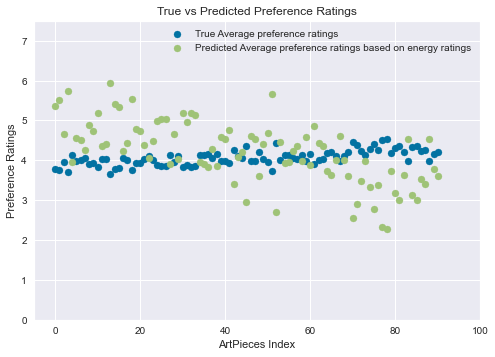

In [5674]:
plt.scatter(range(len(y_pred_based_average)), y_pred_based_average, label='True Average preference ratings')
plt.scatter(range(len(X_val_mean)), X_val_mean, label='Predicted Average preference ratings based on energy ratings')
plt.xlim(-5, 100)
plt.ylim(0, 7.5)

plt.xlabel('ArtPieces Index')
plt.ylabel('Preference Ratings')
plt.title('True vs Predicted Preference Ratings')
plt.legend()
plt.show()

In addition, if we look at the plot, we can see that the overall distribution of predicted average preference ratings for each artpiece is quite close to the true average preference ratings, showing that the model has somewhat predict power.

# 6 Build a regression model to predict art preference ratings from energy ratings and demographic information. Make sure to use cross-validation methods to avoid overfitting and comment on how well your model predicts relative to the “energy ratings only” model.

In [5675]:
## Demographic Information here means: Gender and Age

So I will make a multi-variable linear regression model.
But this time, using average energy ratings for each art piece might not be a good choice because I also need to consider each user's age and gender.

In [5676]:
df_6_gender = df_user.iloc[:,216].to_frame('gender')
df_6_gender

,gender
0,2.0
1,1.0
2,2.0
3,2.0
4,1.0
...,...
295,1.0
296,1.0
297,1.0
298,2.0


In [5677]:
## since gender is a categorical datatype,  I should use one hot encoder. 
df_gender_onehot = pd.get_dummies(df_user.iloc[:,216], prefix='gender')
df_gender_onehot

,gender_1.0,gender_2.0,gender_3.0
0,0,1,0
1,1,0,0
2,0,1,0
3,0,1,0
4,1,0,0
...,...,...,...
295,1,0,0
296,1,0,0
297,1,0,0
298,0,1,0


In [5678]:
## Column 216: User age
df_age = df_user.iloc[:,215].to_frame('Age')
df_age.head()

,Age
0,19.0
1,20.0
2,18.0
3,21.0
4,22.0


In [5679]:
df_user_energe

,91,92,93,94,95,96,97,98,99,100,...,172,173,174,175,176,177,178,179,180,181
0,5,3,4,3,4,4,4,5,5,5,...,4,4,3,4,4,4,4,3,6,4
1,5,2,3,5,5,5,5,7,4,6,...,6,5,3,4,4,3,2,3,5,5
2,4,3,4,3,4,4,4,4,4,4,...,4,4,2,4,4,4,4,4,4,4
3,2,3,3,6,4,4,4,5,5,6,...,5,3,5,5,4,4,5,5,5,4
4,7,5,4,5,4,5,4,7,4,6,...,3,1,5,2,4,1,1,4,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,7,5,4,5,1,7,4,7,7,7,...,4,5,5,4,5,4,6,4,5,4
296,4,5,4,6,4,4,4,4,5,4,...,4,4,7,4,3,4,4,4,4,4
297,3,7,3,2,4,6,4,6,7,6,...,6,5,1,4,5,3,5,1,6,2
298,3,4,4,6,4,6,2,6,7,5,...,7,4,2,4,5,4,6,6,4,3


In [5680]:
## Since i have multiple numerical independent variables, it's better for me to scale them.
standard_energe = StandardScaler().fit_transform(df_user_energe)
standard_Age = StandardScaler().fit_transform(df_age)

In [5681]:
## concate them with one hot encoder gender 
df_input_energy = pd.DataFrame(standard_energe)
df_input_age = pd.DataFrame(standard_Age)
df_input = pd.concat([df_6_gender, df_input_age,df_input_energy], axis=1)
df_input

,gender,0,0,1,2,3,4,5,6,7,...,81,82,83,84,85,86,87,88,89,90
0,2.0,-0.322966,0.775536,-0.806846,0.684843,-0.214248,-0.085592,-0.593717,0.057671,0.067656,...,-0.687718,-0.243492,-0.687098,-0.104022,-0.340297,-0.085292,-0.298144,-0.415747,1.633225,0.048698
1,1.0,0.481566,0.775536,-1.516681,-0.368762,0.893933,0.984309,0.390344,0.968273,1.832583,...,1.010351,0.730477,-0.687098,-0.104022,-0.340297,-1.069433,-2.378220,-0.415747,0.701728,1.022668
2,2.0,-1.127499,0.091240,-0.806846,0.684843,-0.214248,-0.085592,-0.593717,0.057671,-0.814808,...,-0.687718,-0.243492,-1.329246,-0.104022,-0.340297,-0.085292,-0.298144,0.273337,-0.229769,0.048698
3,2.0,1.286099,-1.277354,-0.806846,-0.368762,1.448023,-0.085592,-0.593717,0.057671,0.067656,...,0.161317,-1.217462,0.597198,1.051783,-0.340297,-0.085292,0.741894,0.962420,0.701728,0.048698
4,1.0,2.090631,2.144130,0.612824,0.684843,0.893933,-0.085592,0.390344,0.057671,1.832583,...,-1.536752,-3.165401,0.597198,-2.415634,-0.340297,-3.037715,-3.418258,0.273337,-0.229769,-0.925271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.0,0.481566,2.144130,0.612824,0.684843,0.893933,-3.295296,2.358467,0.057671,1.832583,...,-0.687718,0.730477,0.597198,-0.104022,0.723132,-0.085292,1.781932,0.273337,0.701728,0.048698
296,1.0,1.286099,0.091240,0.612824,0.684843,1.448023,-0.085592,-0.593717,0.057671,-0.814808,...,-0.687718,-0.243492,1.881494,-0.104022,-1.403726,-0.085292,-0.298144,0.273337,-0.229769,0.048698
297,1.0,-0.322966,-0.593057,2.032494,-0.368762,-0.768339,-0.085592,1.374406,0.057671,0.950119,...,1.010351,0.730477,-1.971395,-0.104022,0.723132,-1.069433,0.741894,-1.793915,1.633225,-1.899241
298,2.0,-0.322966,-0.593057,-0.097011,0.684843,1.448023,-0.085592,1.374406,-1.763532,0.950119,...,1.859385,-0.243492,-1.329246,-0.104022,0.723132,-0.085292,1.781932,1.651504,-0.229769,-0.925271


In [5682]:
df_input.reset_index(drop=True)

,gender,0,0,1,2,3,4,5,6,7,...,81,82,83,84,85,86,87,88,89,90
0,2.0,-0.322966,0.775536,-0.806846,0.684843,-0.214248,-0.085592,-0.593717,0.057671,0.067656,...,-0.687718,-0.243492,-0.687098,-0.104022,-0.340297,-0.085292,-0.298144,-0.415747,1.633225,0.048698
1,1.0,0.481566,0.775536,-1.516681,-0.368762,0.893933,0.984309,0.390344,0.968273,1.832583,...,1.010351,0.730477,-0.687098,-0.104022,-0.340297,-1.069433,-2.378220,-0.415747,0.701728,1.022668
2,2.0,-1.127499,0.091240,-0.806846,0.684843,-0.214248,-0.085592,-0.593717,0.057671,-0.814808,...,-0.687718,-0.243492,-1.329246,-0.104022,-0.340297,-0.085292,-0.298144,0.273337,-0.229769,0.048698
3,2.0,1.286099,-1.277354,-0.806846,-0.368762,1.448023,-0.085592,-0.593717,0.057671,0.067656,...,0.161317,-1.217462,0.597198,1.051783,-0.340297,-0.085292,0.741894,0.962420,0.701728,0.048698
4,1.0,2.090631,2.144130,0.612824,0.684843,0.893933,-0.085592,0.390344,0.057671,1.832583,...,-1.536752,-3.165401,0.597198,-2.415634,-0.340297,-3.037715,-3.418258,0.273337,-0.229769,-0.925271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.0,0.481566,2.144130,0.612824,0.684843,0.893933,-3.295296,2.358467,0.057671,1.832583,...,-0.687718,0.730477,0.597198,-0.104022,0.723132,-0.085292,1.781932,0.273337,0.701728,0.048698
296,1.0,1.286099,0.091240,0.612824,0.684843,1.448023,-0.085592,-0.593717,0.057671,-0.814808,...,-0.687718,-0.243492,1.881494,-0.104022,-1.403726,-0.085292,-0.298144,0.273337,-0.229769,0.048698
297,1.0,-0.322966,-0.593057,2.032494,-0.368762,-0.768339,-0.085592,1.374406,0.057671,0.950119,...,1.010351,0.730477,-1.971395,-0.104022,0.723132,-1.069433,0.741894,-1.793915,1.633225,-1.899241
298,2.0,-0.322966,-0.593057,-0.097011,0.684843,1.448023,-0.085592,1.374406,-1.763532,0.950119,...,1.859385,-0.243492,-1.329246,-0.104022,0.723132,-0.085292,1.781932,1.651504,-0.229769,-0.925271


In [5683]:
## since I use RMSE to evaluate my model, it's better for me to rescale the target variable also(rmse is sensitive to scale)
standard_prefer = StandardScaler().fit_transform(df_preferratings)
df_output = pd.DataFrame(standard_prefer)
df_output

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,1.235122,0.334103,-1.882380,0.124423,-0.866232,-1.356398,0.438729,-0.429568,0.985727,0.931936,...,-1.283246,-0.787547,-1.484011,-1.583385,-0.735454,-1.658701,-1.506005,0.058004,0.761770,-1.017325
1,0.518417,0.334103,0.464077,0.124423,0.589620,0.242499,-0.209639,0.994414,-2.016488,0.198128,...,-0.010605,1.058266,-0.881571,-0.894957,-0.112188,1.689955,-1.506005,-0.611272,-1.197067,0.878311
2,1.235122,0.334103,1.246229,0.124423,0.589620,1.041948,1.735467,0.994414,0.235174,0.198128,...,0.625715,0.442995,1.528189,1.858757,-0.112188,0.350493,0.413831,0.058004,0.108824,0.246433
3,0.518417,0.334103,0.464077,0.918610,1.317546,0.242499,-0.209639,0.994414,0.985727,0.931936,...,1.262036,1.058266,0.925749,0.481900,-0.735454,0.350493,0.413831,-0.611272,-0.544122,0.878311
4,1.235122,-0.568877,0.464077,-0.669765,1.317546,0.242499,0.438729,1.706405,0.985727,1.665744,...,0.625715,-1.402818,-0.279131,-0.894957,1.134344,0.350493,-0.866060,-0.611272,1.414716,-0.385446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.235122,1.237082,2.028382,0.918610,2.045472,1.841397,1.735467,1.706405,1.736281,1.665744,...,-0.010605,-0.172276,-0.279131,0.481900,-0.112188,0.350493,-0.866060,-1.280548,0.108824,-1.017325
296,-0.914994,-0.568877,1.246229,0.124423,-0.138306,-1.356398,-0.209639,0.994414,-0.515380,0.931936,...,-1.283246,-0.172276,1.528189,0.481900,0.511078,-1.658701,0.413831,0.727280,0.108824,-0.385446
297,1.235122,0.334103,0.464077,-3.052327,0.589620,1.041948,1.087098,0.282423,0.235174,1.665744,...,-0.646926,-0.172276,0.925749,-0.894957,-0.112188,-0.988970,-0.866060,0.727280,1.414716,-1.017325
298,1.235122,-1.471857,-0.318075,0.124423,-0.138306,0.242499,0.438729,-1.853549,1.736281,-2.003295,...,-0.646926,0.442995,-0.279131,0.481900,1.134344,0.350493,1.693722,0.727280,0.108824,0.878311


In [5684]:
nan_rows = df_input[df_input.isna().any(axis=1)]
nan_rows.shape

(21, 93)

In [5685]:
nan_rows_2 = df_output[df_output.isna().any(axis=1)]
nan_rows_2.shape

(0, 91)

So it's clear that input variables contain some nan value whereas output variables contain so.
Since the nan rows is relatively small compare to total number of rows, I think it's acceptable for me to drop these 21 rows.

In [5686]:
df_all = pd.concat([df_input, df_output], axis=1)
df_all

,gender,0,0,1,2,3,4,5,6,7,...,81,82,83,84,85,86,87,88,89,90
0,2.0,-0.322966,0.775536,-0.806846,0.684843,-0.214248,-0.085592,-0.593717,0.057671,0.067656,...,-1.283246,-0.787547,-1.484011,-1.583385,-0.735454,-1.658701,-1.506005,0.058004,0.761770,-1.017325
1,1.0,0.481566,0.775536,-1.516681,-0.368762,0.893933,0.984309,0.390344,0.968273,1.832583,...,-0.010605,1.058266,-0.881571,-0.894957,-0.112188,1.689955,-1.506005,-0.611272,-1.197067,0.878311
2,2.0,-1.127499,0.091240,-0.806846,0.684843,-0.214248,-0.085592,-0.593717,0.057671,-0.814808,...,0.625715,0.442995,1.528189,1.858757,-0.112188,0.350493,0.413831,0.058004,0.108824,0.246433
3,2.0,1.286099,-1.277354,-0.806846,-0.368762,1.448023,-0.085592,-0.593717,0.057671,0.067656,...,1.262036,1.058266,0.925749,0.481900,-0.735454,0.350493,0.413831,-0.611272,-0.544122,0.878311
4,1.0,2.090631,2.144130,0.612824,0.684843,0.893933,-0.085592,0.390344,0.057671,1.832583,...,0.625715,-1.402818,-0.279131,-0.894957,1.134344,0.350493,-0.866060,-0.611272,1.414716,-0.385446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.0,0.481566,2.144130,0.612824,0.684843,0.893933,-3.295296,2.358467,0.057671,1.832583,...,-0.010605,-0.172276,-0.279131,0.481900,-0.112188,0.350493,-0.866060,-1.280548,0.108824,-1.017325
296,1.0,1.286099,0.091240,0.612824,0.684843,1.448023,-0.085592,-0.593717,0.057671,-0.814808,...,-1.283246,-0.172276,1.528189,0.481900,0.511078,-1.658701,0.413831,0.727280,0.108824,-0.385446
297,1.0,-0.322966,-0.593057,2.032494,-0.368762,-0.768339,-0.085592,1.374406,0.057671,0.950119,...,-0.646926,-0.172276,0.925749,-0.894957,-0.112188,-0.988970,-0.866060,0.727280,1.414716,-1.017325
298,2.0,-0.322966,-0.593057,-0.097011,0.684843,1.448023,-0.085592,1.374406,-1.763532,0.950119,...,-0.646926,0.442995,-0.279131,0.481900,1.134344,0.350493,1.693722,0.727280,0.108824,0.878311


In [5687]:
df_all = df_all.dropna()
df_input = df_all.iloc[:,0:95]
df_output =  df_all.iloc[:,95:]
print(df_input.shape,df_output.shape)

(279, 95) (279, 89)


In [5688]:
df_input

,gender,0,0,1,2,3,4,5,6,7,...,83,84,85,86,87,88,89,90,0,1
0,2.0,-0.322966,0.775536,-0.806846,0.684843,-0.214248,-0.085592,-0.593717,0.057671,0.067656,...,-0.687098,-0.104022,-0.340297,-0.085292,-0.298144,-0.415747,1.633225,0.048698,1.235122,0.334103
1,1.0,0.481566,0.775536,-1.516681,-0.368762,0.893933,0.984309,0.390344,0.968273,1.832583,...,-0.687098,-0.104022,-0.340297,-1.069433,-2.378220,-0.415747,0.701728,1.022668,0.518417,0.334103
2,2.0,-1.127499,0.091240,-0.806846,0.684843,-0.214248,-0.085592,-0.593717,0.057671,-0.814808,...,-1.329246,-0.104022,-0.340297,-0.085292,-0.298144,0.273337,-0.229769,0.048698,1.235122,0.334103
3,2.0,1.286099,-1.277354,-0.806846,-0.368762,1.448023,-0.085592,-0.593717,0.057671,0.067656,...,0.597198,1.051783,-0.340297,-0.085292,0.741894,0.962420,0.701728,0.048698,0.518417,0.334103
4,1.0,2.090631,2.144130,0.612824,0.684843,0.893933,-0.085592,0.390344,0.057671,1.832583,...,0.597198,-2.415634,-0.340297,-3.037715,-3.418258,0.273337,-0.229769,-0.925271,1.235122,-0.568877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.0,0.481566,2.144130,0.612824,0.684843,0.893933,-3.295296,2.358467,0.057671,1.832583,...,0.597198,-0.104022,0.723132,-0.085292,1.781932,0.273337,0.701728,0.048698,1.235122,1.237082
296,1.0,1.286099,0.091240,0.612824,0.684843,1.448023,-0.085592,-0.593717,0.057671,-0.814808,...,1.881494,-0.104022,-1.403726,-0.085292,-0.298144,0.273337,-0.229769,0.048698,-0.914994,-0.568877
297,1.0,-0.322966,-0.593057,2.032494,-0.368762,-0.768339,-0.085592,1.374406,0.057671,0.950119,...,-1.971395,-0.104022,0.723132,-1.069433,0.741894,-1.793915,1.633225,-1.899241,1.235122,0.334103
298,2.0,-0.322966,-0.593057,-0.097011,0.684843,1.448023,-0.085592,1.374406,-1.763532,0.950119,...,-1.329246,-0.104022,0.723132,-0.085292,1.781932,1.651504,-0.229769,-0.925271,1.235122,-1.471857


In [5689]:
## use k-folder cross validation
k = 7
kf = KFold(n_splits = k, shuffle = True, random_state = N_number)
kf.split(df_input)

## Use MSE
rmse_scores_energy_gender_age = []

#Use LR
model_energy_gender_age = LinearRegression()
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5690]:

for train_idx, val_idx in kf.split(df_input):  
    X_train_energy_gender_age = df_input.iloc[train_idx]
    y_train_energy_gender_age = df_output.iloc[train_idx]
    X_val_energy_gender_age = df_input.iloc[val_idx]
    y_val_energy_gender_age = df_output.iloc[val_idx]

    # Train the models on the training data
    model_energy_gender_age.fit(X_train_energy_gender_age, y_train_energy_gender_age)

    # Make predictions on the validation data and compute MSE
    y_pred_energy_gender_age = model_energy_gender_age.predict(X_val_energy_gender_age)
    rmse_energy_gender_age = np.sqrt(mean_squared_error(y_val_energy_gender_age, y_pred_energy_gender_age))
    rmse_scores_energy_gender_age.append(rmse_energy_gender_age)
warnings.resetwarnings()

In [5691]:
print(rmse_scores_no_average)
## this is the RMSE if we only use each user's energy rating as independent variable (if we did not use average preference
## ratings and average energy ratings for each art piece here)

[1.3380789614218624, 1.5064345666946093, 1.4618923202117682, 1.5131959980282854, 1.3661705126460622, 1.5001472708055714, 1.3304197132619318]


In [5692]:
print(mse_scores_energy_gender_age)

[1.365991176168939, 1.2372298928003003, 1.2663671625050466, 1.2894385223707439, 1.326349139423394, 1.3036357081509022, 1.1841058464643177]


In [5693]:
np.mean(rmse_scores_no_average)

1.4309056204385844

In [5694]:
## make a seaborn scatterplot to compare

In [5695]:
df_121 = pd.DataFrame([rmse_scores_no_average, mse_scores_energy_gender_age])
df_121 = df_121.rename(index = {0 : 'energy only', 1 : 'energy,gender,age'})
df_121

,0,1,2,3,4,5,6
energy only,1.338079,1.506435,1.461892,1.513196,1.366171,1.500147,1.330420
"energy,gender,age",1.365991,1.237230,1.266367,1.289439,1.326349,1.303636,1.184106


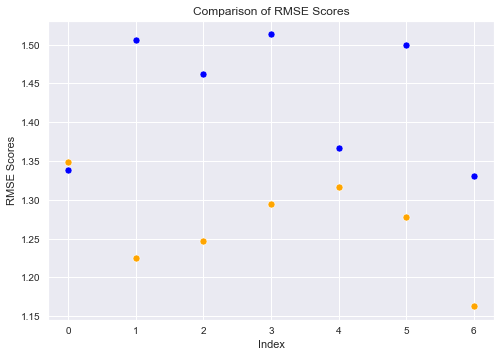

In [5696]:
data = {"rmse_scores_no_average": rmse_scores_no_average,
        "rmse_scores_energy_gender_age": rmse_scores_energy_gender_age}
df = pd.DataFrame(data)
sns.set_style("darkgrid")
sns.scatterplot(data=df, x = df.index, y = "rmse_scores_no_average", color="blue")
sns.scatterplot(data=df, x = df.index, y = "rmse_scores_energy_gender_age", color="orange")

plt.xlabel("Index")
plt.ylabel("RMSE Scores")
plt.title("Comparison of RMSE Scores")
plt.show()

We can see that after adding these two demographic variables, the overall RMSE of the model somehow declines ( the second folder to the seventh folder). Thus, It's quite convincing that this model would have better performance than “energy ratings only” model.

# 7 Considering the 2D space of average preference ratings vs. average energy rating (that contains the 91 art pieces as elements), how many clusters can I – algorithmically - identify in this space? 

In [5698]:
## SO USE k-means to find number of clusters 
## X-axis should be average value of energy ratings for each artpieces
## Y-axis can be averge value of preference ratings for each artpieces

In [5699]:
df_user_energe
df_preferratings

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,7,6,2,6,3,3,5,4,6,6,...,1,2,2,1,2,1,1,5,5,2
1,6,6,5,6,5,5,4,6,2,5,...,3,5,3,2,3,6,1,4,2,5
2,7,6,6,6,5,6,7,6,5,5,...,4,4,7,6,3,4,4,5,4,4
3,6,6,5,7,6,5,4,6,6,6,...,5,5,6,4,2,4,4,4,3,5
4,7,5,5,5,6,5,5,7,6,7,...,4,1,4,2,5,4,2,4,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,7,7,7,7,7,7,7,7,7,7,...,3,3,4,4,3,4,2,3,4,2
296,4,5,6,6,4,3,4,6,4,6,...,1,3,7,4,4,1,4,6,4,3
297,7,6,5,2,5,6,6,5,5,7,...,2,3,6,2,3,2,2,6,6,2
298,7,4,4,6,4,5,5,2,7,2,...,2,4,4,4,5,4,6,6,4,5


In [5700]:
df_mean_energe = df_user_energe.mean()
df_mean_energe = df_mean_energe.reset_index(drop = True)

In [5701]:
df_mean_preferratings = df_preferratings.mean()
df_mean_preferratings = df_mean_preferratings.reset_index(drop = True)

In [5702]:
df_mean_energy_prefer = pd.DataFrame({ "Mean Preference Ratings": df_mean_preferratings, "Mean Energy Ratings": df_mean_energe})

df_mean_energy_prefer


,Mean Preference Ratings,Mean Energy Ratings
0,5.276667,3.866667
1,5.630000,4.136667
2,4.406667,3.350000
3,5.843333,3.386667
4,4.190000,4.080000
...,...,...
86,3.476667,4.086667
87,3.353333,4.286667
88,4.913333,3.603333
89,3.833333,4.246667


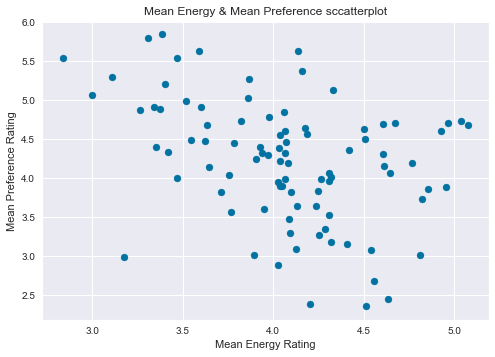

In [5703]:
## make a scatterplot to directly see some obvious pattern if the data have
x = df_mean_energy_prefer["Mean Energy Ratings"]
y = df_mean_energy_prefer["Mean Preference Ratings"]
plt.scatter(x, y)
plt.xlabel("Mean Energy Rating")
plt.ylabel("Mean Preference Rating")
plt.title("Mean Energy & Mean Preference sccatterplot")
plt.show();

In [5704]:
## Regard them(energy and preference) as featuress
X_feature = df_mean_energy_prefer.iloc[:, 0:].values

In [5705]:
kmeans = KMeans(n_clusters=1, max_iter=500, n_init=2, random_state=N_number)
kmeans.fit(X_feature)

KMeans(max_iter=500, n_clusters=1, n_init=2, random_state=12388176)

In [5706]:
# Put it in a loop and use elbow to find appropriate K
## sum of squared distances =SSD
SSD = []
for i in range(1, 50):
    kmeans = KMeans(n_clusters=i, max_iter=500, n_init=2, random_state=N_number)
    kmeans.fit(X_feature)
    SSD.append(kmeans.inertia_)
len(SSD)

49

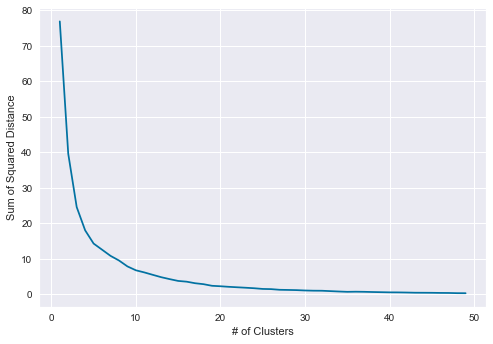

In [5707]:
plt.plot([i for i in range(1,50)], SSD)
plt.xlabel('# of Clusters')
plt.ylabel('Sum of Squared Distance')
plt.show()

silhouette_score for #6 clusters is 0.3515992181795499
silhouette_score for #7 clusters is 0.333998188244727
silhouette_score for #8 clusters is 0.35964710088986757
silhouette_score for #9 clusters is 0.3770893438172194
silhouette_score for #10 clusters is 0.4012624389164733
silhouette_score for #11 clusters is 0.39958736615817336
silhouette_score for #12 clusters is 0.40005202460284905
silhouette_score for #13 clusters is 0.3922418004984271


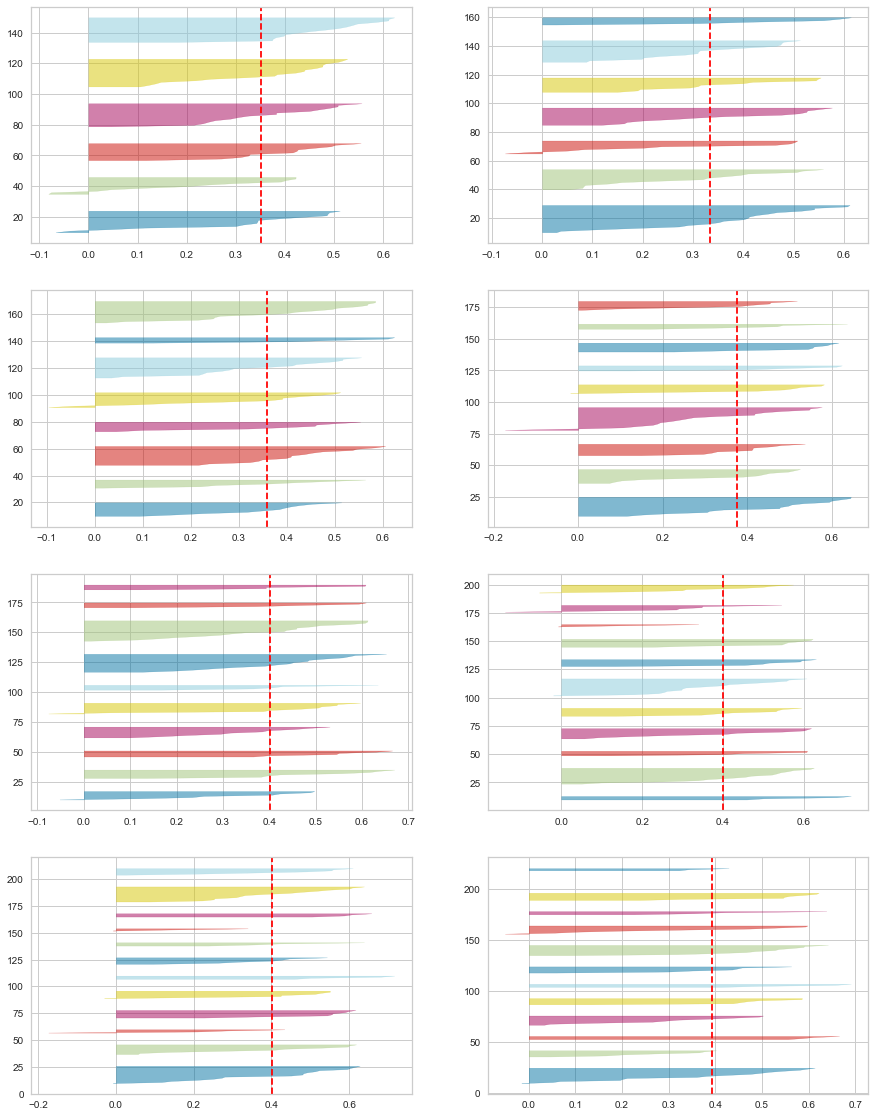

In [5720]:
## from the graph above, i cannot get a precise value for optimal K. Therefore, I take a further step to do silhouette score
fig, ax = plt.subplots(4, 2, figsize=(15,20))

for i in [6,7,8,9,10,11,12,13]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=N_number)
    # divmod -- get index, plot in subplot
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-3][mod])
    visualizer.fit(X_feature)
    
    ## get score
    km.fit(X_feature)
    labels = km.labels_
    silhouette_avg = silhouette_score(X_feature, labels)
    print(f'silhouette_score for #{i} clusters is {silhouette_avg}')


In [5721]:
## So I pick 10 as my optimal number of clusters. 
##(Though K = 15 can provide a higher score, I think 10 is a more appropriate vakue considering there are only 92 datapoints)
num_clusters = 10
kmeans = KMeans(n_clusters= num_clusters, max_iter=500, n_init=2, random_state=N_number)
kmeans.fit(X_feature)
labels = kmeans.fit_predict(X_feature)

labels

array([5, 5, 0, 9, 7, 4, 7, 4, 4, 4, 1, 4, 0, 9, 9, 9, 0, 4, 1, 7, 7, 7,
       0, 6, 7, 1, 1, 6, 7, 0, 5, 5, 1, 1, 6, 2, 6, 0, 0, 1, 7, 7, 6, 4,
       7, 3, 4, 4, 6, 4, 5, 9, 3, 7, 6, 7, 2, 7, 2, 7, 2, 7, 0, 7, 6, 6,
       6, 7, 2, 6, 8, 8, 6, 2, 3, 3, 3, 8, 8, 6, 3, 8, 3, 7, 3, 3, 6, 3,
       1, 6, 6], dtype=int32)

In [5722]:
## colors
#FF5733 (orange)
#00FFFF (cyan)
#9400D3 (purple)
#32CD32 (lime green)
#FF1493 (pink)
#8B0000 (dark red)
#00CED1 (dark turquoise)
#FFD700 (gold)
#6B8E23 (olive green)
#FF00FF (magenta)
label_colors = ['#FF5733','#00FFFF','#9400D3','#32CD32','#FF1493','#8B0000','#00CED1', '#FFD700', '#6B8E23', '#FF00FF']


In [5723]:
## plot to show the centroids

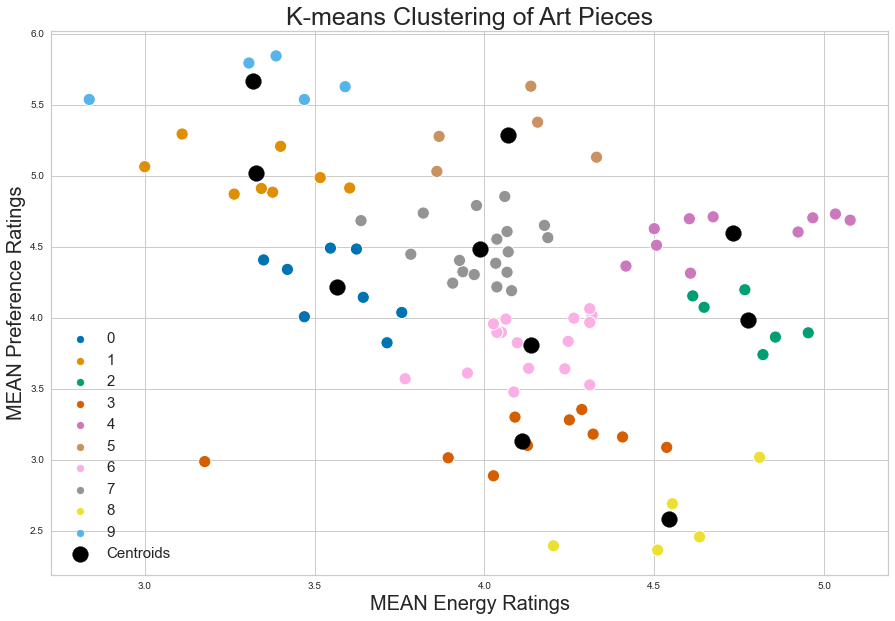

In [5724]:
plt.figure(figsize=(15, 10))
sns.set_style('whitegrid')
sns.scatterplot(x = 'Mean Energy Ratings', y = 'Mean Preference Ratings', hue = labels,
                palette = 'colorblind', data = df_mean_energy_prefer,s = 150, alpha = 1)
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], s=250,
            c='black', label='Centroids')

plt.xlabel('MEAN Energy Ratings', fontsize=20)
plt.ylabel('MEAN Preference Ratings', fontsize=20)
plt.title('K-means Clustering of Art Pieces', fontsize=25)

plt.legend(fontsize=15, loc='lower left', framealpha=1)
plt.show()

In [5725]:
## check these clusters' identities by looking at the labels predicted 

In [5726]:
labels

array([5, 5, 0, 9, 7, 4, 7, 4, 4, 4, 1, 4, 0, 9, 9, 9, 0, 4, 1, 7, 7, 7,
       0, 6, 7, 1, 1, 6, 7, 0, 5, 5, 1, 1, 6, 2, 6, 0, 0, 1, 7, 7, 6, 4,
       7, 3, 4, 4, 6, 4, 5, 9, 3, 7, 6, 7, 2, 7, 2, 7, 2, 7, 0, 7, 6, 6,
       6, 7, 2, 6, 8, 8, 6, 2, 3, 3, 3, 8, 8, 6, 3, 8, 3, 7, 3, 3, 6, 3,
       1, 6, 6], dtype=int32)

In [5727]:
dict_for_identity = {}
for i in range(0,num_clusters):
    index = np.where(labels == i)
    dict_for_identity[i] = df_art.iloc[index].Style

In [5728]:
dict_for_identity[0].values

array(['Italian Renaissance', 'Rococo', 'Romanticism / Neoclassicism',
       'Neoclassicism', 'American Realism', 'Metaphysical',
       'New Objectivity', 'New Symbolism / Neo-Expressionism'],
      dtype=object)

In [5729]:
# Calculate the mode of style in each labels in the above dictionary
for i in range(0,num_clusters):
    
    mode = statistics.mode(dict_for_identity[i].values)
    print(f"label {i}'s mode is {mode}")

label 0's mode is Italian Renaissance
label 1's mode is Romanticism
label 2's mode is Art Brut
label 3's mode is Abstract
label 4's mode is Rococo
label 5's mode is Northern Renaissance
label 6's mode is Abstract
label 7's mode is Abstract Expressionism
label 8's mode is Abstract
label 9's mode is Neoclassical


Therefore, it seems like the output labels of k_means clustering is still not so accurate(we can see lots of overlapping in styles between label3,label6,and label8 —— their mode of Art style is the same: Abstract).
But still, the artpieces are  classfied into different (10) clusters and somehow can reflect their particular art styles.

# 8 Considering only the first principal component of the self-image ratings as inputs to a regression model – how well can I predict art preference ratings from that factor alone?

In [5730]:
## Columns 206-215: Self-image/self-esteem.
## higher numbers represent higher self-esteem
df_image = df_user.iloc[:,205:215]
df_image.shape

(300, 10)

In [5731]:
## first drop NAN value data 

In [5732]:
df_image_pref = pd.concat([df_image,df_preferratings],axis = 1)
df_image_pref = df_image_pref.dropna()
df_image_pref

,205,206,207,208,209,210,211,212,213,214,...,81,82,83,84,85,86,87,88,89,90
0,5.0,2.0,5.0,4.0,5.0,2.0,5.0,2.0,3.0,4.0,...,1,2,2,1,2,1,1,5,5,2
1,3.0,2.0,4.0,4.0,2.0,2.0,4.0,3.0,2.0,4.0,...,3,5,3,2,3,6,1,4,2,5
2,3.0,1.0,4.0,4.0,3.0,2.0,4.0,1.0,2.0,2.0,...,4,4,7,6,3,4,4,5,4,4
3,5.0,3.0,5.0,4.0,5.0,2.0,5.0,3.0,5.0,4.0,...,5,5,6,4,2,4,4,4,3,5
4,3.0,3.0,4.0,3.0,5.0,2.0,3.0,4.0,3.0,3.0,...,4,1,4,2,5,4,2,4,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,5.0,5.0,4.0,4.0,3.0,3.0,1.0,3.0,3.0,4.0,...,3,3,4,4,3,4,2,3,4,2
296,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,1,3,7,4,4,1,4,6,4,3
297,2.0,1.0,4.0,4.0,4.0,2.0,4.0,1.0,2.0,2.0,...,2,3,6,2,3,2,2,6,6,2
298,2.0,1.0,4.0,4.0,2.0,2.0,2.0,1.0,3.0,1.0,...,2,4,4,4,5,4,6,6,4,5


In [5733]:
df_image_clean = df_image_pref.iloc[:, 0:10]
df_prefer_clean = df_image_pref.iloc[:, 10:]

In [5734]:
##  tansform to a correlation matrix
corr_data = np.corrcoef(df_image_clean.T)
corr_matrix = pd.DataFrame(corr_data)
corr_matrix

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.487330,0.454857,0.260590,0.475964,0.334147,0.498044,0.383362,0.485359,0.671697
1,0.487330,1.000000,0.181374,0.137891,0.397397,0.575213,0.296646,0.458983,0.492576,0.438918
2,0.454857,0.181374,1.000000,0.340828,0.354799,0.137964,0.459426,0.168541,0.337213,0.427465
3,0.260590,0.137891,0.340828,1.000000,0.218568,0.110457,0.354523,0.062758,0.277739,0.320771
4,0.475964,0.397397,0.354799,0.218568,1.000000,0.357216,0.301706,0.292203,0.540635,0.393702
5,0.334147,0.575213,0.137964,0.110457,0.357216,1.000000,0.170647,0.419216,0.513173,0.310976
6,0.498044,0.296646,0.459426,0.354523,0.301706,0.170647,1.000000,0.216554,0.360577,0.474985
7,0.383362,0.458983,0.168541,0.062758,0.292203,0.419216,0.216554,1.000000,0.395421,0.346261
8,0.485359,0.492576,0.337213,0.277739,0.540635,0.513173,0.360577,0.395421,1.000000,0.421652
9,0.671697,0.438918,0.427465,0.320771,0.393702,0.310976,0.474985,0.346261,0.421652,1.000000


/Users/leoenoch/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:302: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  mesh = ax.pcolormesh(self.plot_data, cmap=self.cmap, **kws)
/Users/leoenoch/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:312: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = ax.figure.colorbar(mesh, cax, ax, **self.cbar_kws)


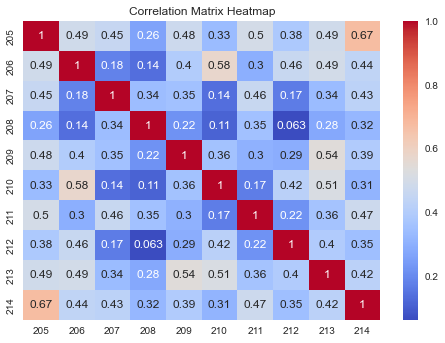

In [5735]:
## use heat map to visualize the correlation
sns.heatmap(df_image_clean.corr(), annot=True, cmap='coolwarm')

# Set the title of the heatmap
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show();

In [5736]:
## standardlize the input variable dataset
standardlized_image = StandardScaler().fit_transform(df_image_clean)
standardlized_image

array([[ 1.43648205, -0.40052697,  1.04912005, ..., -0.25762859,
        -0.30130945,  0.48982511],
       [-0.27532573, -0.40052697, -0.21158724, ...,  0.63010366,
        -1.09922151,  0.48982511],
       [-0.27532573, -1.17451828, -0.21158724, ..., -1.14536085,
        -1.09922151, -1.21858929],
       ...,
       [-1.13122962, -1.17451828, -0.21158724, ..., -1.14536085,
        -1.09922151, -1.21858929],
       [-1.13122962, -1.17451828, -0.21158724, ..., -1.14536085,
        -0.30130945, -2.07279649],
       [ 0.58057816, -1.17451828,  1.04912005, ..., -1.14536085,
        -1.09922151, -0.36438209]])

In [5737]:
## Sample code in our code session does not use covariance matrix of independent variable as the input to pca, 
## so I also only use standardlize data here

In [5738]:
pca = PCA().fit(standardlized_image)
eigvals = pca.explained_variance_
components = pca.components_
print(components.shape)
print(eigvals)

(10, 10)
[4.32881173 1.42326408 0.79853694 0.71719066 0.5973516  0.55332014
 0.51387706 0.41999597 0.37391199 0.30882754]


In [5739]:
df_image_clean.shape[1]

10

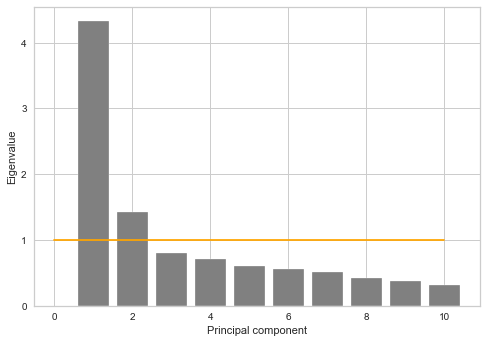

In [5740]:
num_selfimage = df_image_clean.shape[1]
x = np.linspace(1,num_selfimage,num_selfimage)
plt.bar(x, eigvals, color='gray')
plt.plot([0,num_selfimage],[1,1],color='orange') 
# Orange stands for Kaiser criterion line
plt.xlabel('Principal component')
plt.ylabel('Eigenvalue')
plt.show()

In [5741]:
## Here we only use the first component
first_compo = components[0]
first_compo.shape


(10,)

In [5742]:
## use this to predict art preference ratings

In [5743]:
pca = PCA(n_components=1).fit(standardlized_image)

pca_transformed_image = pca.fit_transform(standardlized_image)
pca.components_[0]

array([-0.38364169, -0.33662453, -0.27865626, -0.20687105, -0.3241872 ,
       -0.2909794 , -0.3023467 , -0.2752813 , -0.36173059, -0.36228351])

In [5744]:
pca_transformed_image.shape

(286, 1)

In [5745]:
df_prefer_clean.mean(axis = 1)
## use one 

0      3.626374
1      3.934066
2      5.406593
3      4.802198
4      4.230769
         ...   
295    5.043956
296    4.175824
297    4.329670
298    5.021978
299    5.824176
Length: 286, dtype: float64

In [5746]:
X_train, X_test, y_train, y_test= train_test_split(pca_transformed_image, df_prefer_clean, test_size=0.2, random_state = N_number )

In [5747]:
X_train.shape

(228, 1)

In [5748]:
y_train.shape

(228, 91)

In [5749]:
X_train, X_test, y_train2, y_test2= train_test_split(pca_transformed_data, df_prefer_clean.mean(axis = 1), test_size=0.2, random_state = N_number )

In [5750]:
df_prefer_clean.mean(axis = 1)

0      3.626374
1      3.934066
2      5.406593
3      4.802198
4      4.230769
         ...   
295    5.043956
296    4.175824
297    4.329670
298    5.021978
299    5.824176
Length: 286, dtype: float64

In [5751]:
X_train.shape

(228, 1)

In [5752]:
y_train2.shape

(228,)

In [5753]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_pred,y_test))
print('RMSE value:', rmse)
regressor.coef_.shape


RMSE value: 1.4202592217147978


(91, 1)

In [5754]:
regressor = LinearRegression()
regressor.fit(X_train, y_train2)
y_pred = regressor.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_pred,y_test2))
print('RMSE value:', rmse)

RMSE value: 0.5496556106897929


Given the scale of the target_variable ratings (1-7), I regard the RMSE value quite large.
So, using the first component of self-image ratings to make prediction is not a quite good choice indeed.


If we consider it by using average preference ratings as the single target variable, the RMSE will drop significantly. 
Therefore, using self-image to predict a person's average preference ratings to art piece is somewhat accurate, but it does not make qutie a good sense to use it to predict the user's art preference ratings for each art piecce.

# 9 onsider the first 3 principal components of the “dark personality” traits – use these as inputs to a regression model to predict art preference ratings. Which of these components significantly predict art preference ratings?

In [5755]:
df_dark = df_user.iloc[: ,182:194]
df_dark

,182,183,184,185,186,187,188,189,190,191,192,193
0,4.0,4.0,4.0,2.0,1.0,2.0,2.0,2.0,4.0,4.0,3.0,4.0
1,4.0,3.0,2.0,3.0,3.0,3.0,4.0,3.0,4.0,3.0,4.0,4.0
2,3.0,2.0,4.0,1.0,1.0,1.0,3.0,3.0,4.0,4.0,4.0,2.0
3,2.0,5.0,4.0,2.0,2.0,1.0,4.0,1.0,4.0,4.0,3.0,2.0
4,2.0,4.0,4.0,3.0,2.0,3.0,4.0,3.0,3.0,4.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
295,2.0,4.0,1.0,2.0,2.0,2.0,4.0,2.0,4.0,4.0,4.0,2.0
296,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
297,4.0,4.0,4.0,4.0,2.0,4.0,5.0,5.0,4.0,5.0,3.0,4.0
298,3.0,4.0,4.0,2.0,1.0,1.0,4.0,3.0,4.0,4.0,2.0,3.0


In [5756]:
df_dark_pref = pd.concat([df_dark,df_preferratings],axis = 1)
df_dark_pref = df_dark_pref.dropna()
df_dark_pref

,182,183,184,185,186,187,188,189,190,191,...,81,82,83,84,85,86,87,88,89,90
0,4.0,4.0,4.0,2.0,1.0,2.0,2.0,2.0,4.0,4.0,...,1,2,2,1,2,1,1,5,5,2
1,4.0,3.0,2.0,3.0,3.0,3.0,4.0,3.0,4.0,3.0,...,3,5,3,2,3,6,1,4,2,5
2,3.0,2.0,4.0,1.0,1.0,1.0,3.0,3.0,4.0,4.0,...,4,4,7,6,3,4,4,5,4,4
3,2.0,5.0,4.0,2.0,2.0,1.0,4.0,1.0,4.0,4.0,...,5,5,6,4,2,4,4,4,3,5
4,2.0,4.0,4.0,3.0,2.0,3.0,4.0,3.0,3.0,4.0,...,4,1,4,2,5,4,2,4,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2.0,4.0,1.0,2.0,2.0,2.0,4.0,2.0,4.0,4.0,...,3,3,4,4,3,4,2,3,4,2
296,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,1,3,7,4,4,1,4,6,4,3
297,4.0,4.0,4.0,4.0,2.0,4.0,5.0,5.0,4.0,5.0,...,2,3,6,2,3,2,2,6,6,2
298,3.0,4.0,4.0,2.0,1.0,1.0,4.0,3.0,4.0,4.0,...,2,4,4,4,5,4,6,6,4,5


In [5757]:
df_dark_clean = df_dark_pref.iloc[:,:12]
df_predark_clean = df_dark_pref.iloc[:,12:]

In [5758]:
##  tansform to a correlation matrix
corr_dark = np.corrcoef(df_dark_clean.T)
corr_dark = pd.DataFrame(corr_dark)
corr_dark

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.000000,0.425019,0.290863,0.637478,0.281317,0.326802,0.307324,0.154704,0.209113,0.228925,0.312699,0.317874
1,0.425019,1.000000,0.279883,0.311107,0.145884,0.177744,0.291123,0.243963,0.177896,0.123428,0.235984,0.282200
2,0.290863,0.279883,1.000000,0.208738,0.055986,0.165130,0.092929,0.118922,0.209141,0.229540,0.245257,0.137569
3,0.637478,0.311107,0.208738,1.000000,0.407331,0.442140,0.262659,0.184608,0.103329,0.179117,0.312467,0.388948
4,0.281317,0.145884,0.055986,0.407331,1.000000,0.479655,0.407450,0.161166,0.020035,0.023394,0.150748,0.135396
5,0.326802,0.177744,0.165130,0.442140,0.479655,1.000000,0.315035,0.142517,0.034338,0.053821,0.104319,0.171432
6,0.307324,0.291123,0.092929,0.262659,0.407450,0.315035,1.000000,0.300753,0.101418,0.127893,0.187964,0.103061
7,0.154704,0.243963,0.118922,0.184608,0.161166,0.142517,0.300753,1.000000,0.173478,0.088401,0.123297,0.083339
8,0.209113,0.177896,0.209141,0.103329,0.020035,0.034338,0.101418,0.173478,1.000000,0.503799,0.362032,0.143890
9,0.228925,0.123428,0.229540,0.179117,0.023394,0.053821,0.127893,0.088401,0.503799,1.000000,0.341341,0.249045


/Users/leoenoch/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:302: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  mesh = ax.pcolormesh(self.plot_data, cmap=self.cmap, **kws)
/Users/leoenoch/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:312: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = ax.figure.colorbar(mesh, cax, ax, **self.cbar_kws)


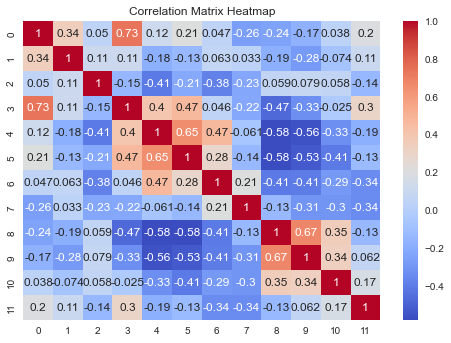

In [5759]:
## use heat map to visualize the correlation
sns.heatmap(corr_dark.corr(), annot=True, cmap='coolwarm')
# Set the title of the heatmap
plt.title('Correlation Matrix Heatmap')
# Show the plot
plt.show();

In [5760]:
transformed_dark = StandardScaler().fit_transform(df_dark_clean)
transformed_dark

array([[ 1.37065751,  0.486728  ,  0.54583197, ...,  0.29304559,
        -0.19002558,  1.06782768],
       [ 1.37065751, -0.41087428, -1.13001969, ..., -0.66356301,
         0.66659767,  1.06782768],
       [ 0.54593986, -1.30847656,  0.54583197, ...,  0.29304559,
         0.66659767, -0.67006952],
       ...,
       [ 1.37065751,  0.486728  ,  0.54583197, ...,  1.24965419,
        -0.19002558,  1.06782768],
       [ 0.54593986,  0.486728  ,  0.54583197, ...,  0.29304559,
        -1.04664883,  0.19887908],
       [-0.2787778 ,  0.486728  ,  1.3837578 , ...,  1.24965419,
        -0.19002558, -1.53901811]])

In [5761]:
transformed_dark = StandardScaler().fit_transform(df_dark_clean)
pca = PCA().fit(transformed_dark)
eigvals = pca.explained_variance_
components = pca.components_
print(components.shape)
print(eigvals)


(12, 12)
[3.59675331 1.67420462 1.11194496 0.99155903 0.86708767 0.70843927
 0.66516392 0.64545847 0.56517419 0.47919864 0.43463976 0.30277898]


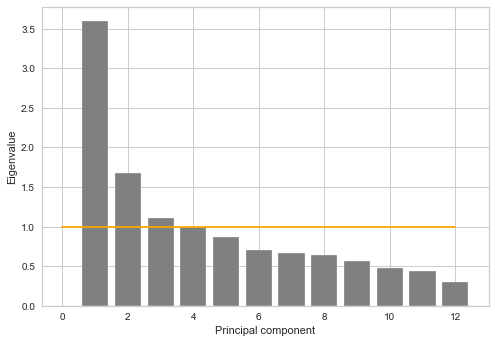

In [5762]:
num_selfdark = df_dark_clean.shape[1]
x = np.linspace(1,num_selfdark,num_selfdark)
plt.bar(x, eigvals, color='gray')
plt.plot([0,num_selfdark],[1,1],color='orange') 
# Orange stands for Kaiser criterion line
plt.xlabel('Principal component')
plt.ylabel('Eigenvalue')
plt.show()

In [5763]:
##  three components reach the Kaiser criterion
## also we will use the first 3 principal components to 

In [5764]:
pca = PCA(n_components=3).fit(transformed_dark)
pca_transformed_dark = pca.fit_transform(transformed_dark)
pca.components_
pca_transformed_dark.shape

(284, 3)

In [5765]:
X_train, X_test, y_train, y_test = train_test_split(pca_transformed_dark, df_predark_clean, test_size=0.2, random_state = N_number )

In [5766]:
X_train.shape

(227, 3)

In [5767]:
y_train

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
115,7,3,5,7,4,5,3,5,5,5,...,4,4,6,6,6,5,5,6,6,5
40,7,7,6,7,6,6,3,5,6,7,...,3,2,2,3,2,2,2,5,3,2
299,7,7,6,7,6,6,3,7,7,7,...,6,6,7,3,2,6,6,6,5,7
202,6,6,5,7,7,7,4,6,6,7,...,2,4,6,3,2,2,5,6,2,2
30,4,5,4,6,4,6,3,4,5,5,...,2,6,5,3,4,4,5,4,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,6,6,2,5,2,4,4,6,4,3,...,5,5,7,3,5,5,3,6,2,5
240,5,7,2,7,4,5,1,5,2,5,...,5,6,6,1,2,2,2,5,1,2
19,6,5,2,7,2,4,5,3,3,3,...,2,1,4,1,1,2,3,3,2,1
27,5,5,6,6,5,6,6,5,5,5,...,3,2,3,2,2,5,2,6,4,4


In [5768]:
## to check significance, I decide to use sm.OLS since it has a concise summary method

In [5769]:
y_train_mean9 = y_train.mean(axis=1)
y_train_mean9


115    5.197802
40     4.362637
299    5.824176
202    4.274725
30     3.879121
         ...   
89     3.912088
240    3.648352
19     3.384615
27     4.131868
159    4.538462
Length: 227, dtype: float64

In [5770]:
X_train.shape

(227, 3)

In [5771]:
## I decide to use average preference ratings here for as the target variable since avearge preference ratings provided a lower RMSE

In [5772]:
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train_mean9,X_train).fit()
print_model = model.summary()
p_vals = model.pvalues[1:]
p_vals

x1    0.652498
x2    0.008122
x3    0.019488
dtype: float64

In [5773]:
rmse = model.mse_resid ** 0.5
print('RMSE:', rmse)

RMSE: 0.6164963061034816


The p-value for the second and the third component is less than 0.05, so I consider these two as significant.

In [5774]:
## so both second & third component
x = np.linspace(1,num_selfdark,num_selfdark)
loadings = pca.components_

[-0.0476592   0.02254705  0.20488777 -0.17929028 -0.41596732 -0.37286515
 -0.24372442 -0.05045757  0.48141686  0.46695065  0.29530943  0.10990302]


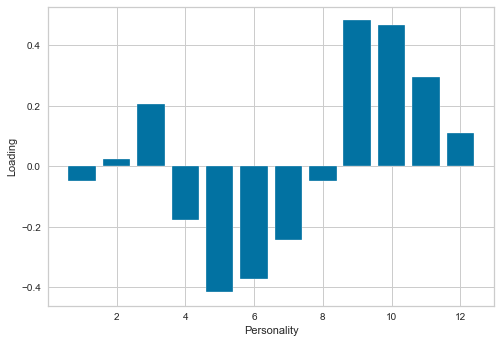

In [5775]:
whichPrincipalComponent = 1 # Select the first index-- ie. the second component
plt.bar(x,loadings[whichPrincipalComponent,:]*-1) 
plt.xlabel('Personality')
plt.ylabel('Loading')
print(loadings[whichPrincipalComponent,:]*-1)
plt.show()

[-0.23818308  0.02871615 -0.05325621 -0.31182772  0.10530736 -0.04055347
  0.44617636  0.60886775  0.27230599  0.08491131 -0.04546547 -0.42001947]


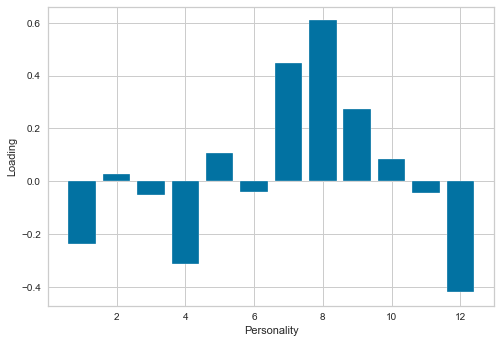

In [5776]:
whichPrincipalComponent = 2 # Select the second index-- ie. the third component
plt.bar(x,loadings[whichPrincipalComponent,:]*-1) 
plt.xlabel('Personality')
plt.ylabel('Loading')
print(loadings[whichPrincipalComponent,:]*-1)
plt.show()


for the first component, factors like 9 I tend to want others to admire me , 10 I tend to want others to pay attention to me , 11 I tend to seek prestige and status should be potential identities.

for the second component, factors like 7 I can be callous or insensitive , 8 I tend to be cynical, 9 I tend to want others to admire me should be potential identities.


# 10 determine the political orientation of the users (to simplify things and avoid gross class imbalance issues: “left” (progressive & liberal) vs. “non- left” (everyone else)) from all the other information available, using any classification model of your choice? 

In [5777]:
df_user

,0,1,2,3,4,5,6,7,8,9,...,211,212,213,214,215,216,217,218,219,220
0,7,6,2,6,3,3,5,4,6,6,...,5.0,2.0,3.0,4.0,19.0,2.0,3.0,0.0,2.0,2.0
1,6,6,5,6,5,5,4,6,2,5,...,4.0,3.0,2.0,4.0,20.0,1.0,6.0,1.0,3.0,1.0
2,7,6,6,6,5,6,7,6,5,5,...,4.0,1.0,2.0,2.0,18.0,2.0,2.0,1.0,1.0,2.0
3,6,6,5,7,6,5,4,6,6,6,...,5.0,3.0,5.0,4.0,21.0,2.0,5.0,1.0,3.0,0.0
4,7,5,5,5,6,5,5,7,6,7,...,3.0,4.0,3.0,3.0,22.0,1.0,3.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,7,7,7,7,7,7,7,7,7,7,...,1.0,3.0,3.0,4.0,20.0,1.0,3.0,1.0,1.0,2.0
296,4,5,6,6,4,3,4,6,4,6,...,3.0,3.0,3.0,3.0,21.0,1.0,2.0,2.0,2.0,1.0
297,7,6,5,2,5,6,6,5,5,7,...,4.0,1.0,2.0,2.0,19.0,1.0,2.0,2.0,0.0,2.0
298,7,4,4,6,4,5,5,2,7,2,...,2.0,1.0,3.0,1.0,19.0,2.0,2.0,2.0,2.0,1.0


In [5778]:
## Column 218: Political orientation (1 = progressive, 2 = liberal, 3 = moderate, 4 = conservative,
##. 5 = libertarian, 6 = independent)

In [5779]:
df_political = df_user.iloc[:,217].to_frame('political orientation')

In [5780]:
## so first, convert to left and non-left

In [5781]:
political_mapping = {1: 1, 2: 1, 3: 0, 4: 0, 5: 0, 6: 0}

df_political = df_political.replace(political_mapping)
df_political

,political orientation
0,0.0
1,0.0
2,1.0
3,0.0
4,0.0
...,...
295,0.0
296,1.0
297,1.0
298,1.0


## Use logistic regression model
set threshold as 0.5 
if >=. 0.5 then left, otherwise non left

## Intuitionally, i think these types of variables are correlated with political orientation

df_gender, df_age ,df_personality , df_action_preferences , Self-image/self-esteem

##  better if I do pca and make a correlation table contains all variables to see them


In [5782]:
general_opera = df_user.iloc[:,220].to_frame('general_opera')
artist_myself = df_user.iloc[:,219].to_frame('artist_myself')

In [5783]:
df_prefer_mean= df_preferratings.mean().to_frame('df_prefer_mean')
df_user_artbg

,artbackgroundyears
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0
...,...
295,1.0
296,2.0
297,2.0
298,2.0


In [5784]:
df_energy_mean = df_user_energe.mean(axis = 1).to_frame('df_energy_mean')
df_user_artbg

,artbackgroundyears
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0
...,...
295,1.0
296,2.0
297,2.0
298,2.0


In [5785]:
df_prefer_mean = df_preferratings.mean(axis = 1).to_frame('df_prefer_mean')

# Categorical variables here are already converted into numerical variables, and they are used to represent  different levels of a variable, such as low, medium, and high except for gender. So I dont need to convert them

In [5786]:
df_10 = pd.concat([df_energy_mean,df_prefer_mean, df_age,df_gender,df_user_artbg,artist_myself,general_opera],axis = 1)
df_10

,df_energy_mean,df_prefer_mean,Age,216,artbackgroundyears,artist_myself,general_opera
0,3.912088,3.626374,19.0,2.0,0.0,2.0,2.0
1,3.901099,3.934066,20.0,1.0,1.0,3.0,1.0
2,3.901099,5.406593,18.0,2.0,1.0,1.0,2.0
3,4.010989,4.802198,21.0,2.0,1.0,3.0,0.0
4,3.747253,4.230769,22.0,1.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...
295,4.648352,5.043956,20.0,1.0,1.0,1.0,2.0
296,4.098901,4.175824,21.0,1.0,2.0,2.0,1.0
297,4.109890,4.329670,19.0,1.0,2.0,0.0,2.0
298,4.857143,5.021978,19.0,2.0,2.0,2.0,1.0


In [5787]:
##  also dark personality , action preference, and self image needed to be processed by PCA

In [5788]:
df_action = df_user.iloc[:,194:205]

In [5789]:
df_action = df_action.dropna()

In [5790]:
transformed_action = StandardScaler().fit_transform(df_action)
pca = PCA().fit(transformed_action)
eigvals = pca.explained_variance_
components = pca.components_
print(components.shape)
print(eigvals)

(11, 11)
[2.61179501 1.72812011 1.27301422 0.97271751 0.92231399 0.78398746
 0.70508034 0.6225556  0.53785766 0.49761189 0.38367861]


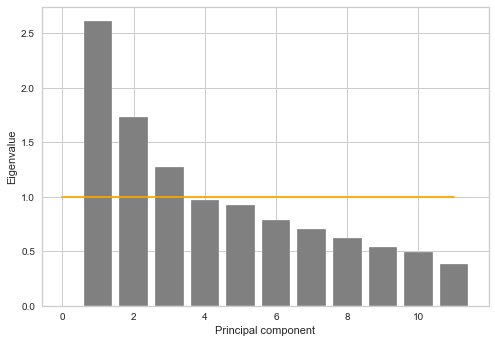

In [5791]:
num_action = df_action.shape[1]
x = np.linspace(1,num_action,num_action)
plt.bar(x, eigvals, color='gray')
plt.plot([0,num_action],[1,1],color='orange') 
# Orange stands for Kaiser criterion line
plt.xlabel('Principal component')
plt.ylabel('Eigenvalue')
plt.show()


In [5792]:
## since 3 components reach  Kaiser criterion, we will use three components here

In [5793]:
pca = PCA(n_components=3).fit(transformed_action)
pca_transformed_action = pca.fit_transform(transformed_action)
pca.components_
pca_transformed_action.shape


(285, 3)

In [5794]:
cols = ['action1', 'action2', 'action3']

# convert the numpy array to a pandas DataFrame with specified column names
pca_transformed_action = pd.DataFrame(pca_transformed_action, columns=cols)

From question 8, we derive the pca components from self-image, but indeed two of them satisfies.

In [5795]:
pca = PCA().fit(standardlized_image)
eigvals = pca.explained_variance_
components = pca.components_
print(components.shape)
print(eigvals)


(10, 10)
[4.32881173 1.42326408 0.79853694 0.71719066 0.5973516  0.55332014
 0.51387706 0.41999597 0.37391199 0.30882754]


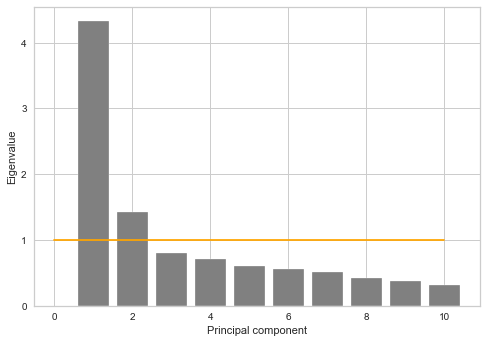

In [5796]:
num_image = df_image.shape[1]
x = np.linspace(1,num_image,num_image)
plt.bar(x, eigvals, color='gray')
plt.plot([0,num_image],[1,1],color='orange') 
# Orange stands for Kaiser criterion line
plt.xlabel('Principal component')
plt.ylabel('Eigenvalue')
plt.show()

In [5797]:
## so set n = 2
pca = PCA(n_components=2).fit(standardlized_image)
pca_transformed_image = pca.fit_transform(standardlized_image)
pca.components_
pca_transformed_image.shape

cols = ['image1', 'image2']

# convert the numpy array to a pandas DataFrame with specified column names
pca_transformed_image = pd.DataFrame(pca_transformed_image, columns=cols)

we already extract the 3 components of dark personality from 9 (also only 3 components satisfy the Kaiser criterion )

In [5798]:
pca_transformed_dark.shape


(284, 3)

In [5799]:
cols = ['dark1', 'dark2', 'dark3']

# convert the numpy array to a pandas DataFrame with specified column names
pca_transformed_dark = pd.DataFrame(pca_transformed_dark, columns=cols)


In [5800]:
## now concate all these dependent variables to gether to the dataframe

In [5801]:
df_all_variables = pd.concat([df_10, pca_transformed_image, pca_transformed_action, pca_transformed_dark], axis = 1).dropna()

In [5802]:
df_all_variables

,df_energy_mean,df_prefer_mean,Age,216,artbackgroundyears,artist_myself,general_opera,image1,image2,action1,action2,action3,dark1,dark2,dark3
0,3.912088,3.626374,19.0,2.0,0.0,2.0,2.0,-1.445865,-1.490142,1.369201,-1.182123,-0.605226,0.370787,-0.932396,1.853995
1,3.901099,3.934066,20.0,1.0,1.0,3.0,1.0,0.718904,-0.306531,0.050241,-0.877997,-0.146443,1.442636,1.280044,0.825059
2,3.901099,5.406593,18.0,2.0,1.0,1.0,2.0,1.821857,-0.906128,-1.830215,-0.204803,-1.425069,-0.934281,-1.237839,-0.150285
3,4.010989,4.802198,21.0,2.0,1.0,3.0,0.0,-2.528044,-0.678157,1.758487,-0.778773,-0.191179,-0.173592,-0.436482,0.304489
4,3.747253,4.230769,22.0,1.0,0.0,3.0,0.0,-0.032726,1.444741,0.482411,-0.194667,0.521835,0.714625,0.916670,0.404670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,4.076923,3.780220,19.0,1.0,0.0,1.0,1.0,0.749399,-0.175981,-0.992061,0.321295,2.578788,-0.375494,0.210280,-0.203658
280,5.032967,4.879121,20.0,1.0,1.0,0.0,2.0,-3.287802,-0.569480,1.995073,-0.236266,2.788381,0.339772,1.749080,0.947081
281,4.263736,4.340659,18.0,1.0,1.0,3.0,0.0,-0.582931,2.011291,1.183225,-0.229805,0.217569,3.230669,0.688688,-0.225651
282,4.439560,4.098901,19.0,3.0,1.0,2.0,2.0,0.833923,1.995769,-0.414028,-0.623260,1.819073,-0.060370,-0.499917,-0.005087


In [5803]:
## we never standardlize categorical variables，and for variables derived from PCA we also do not need to perform pca.
## so I only standardlize the first three columns.

In [5804]:
df_needd_standardlized = df_all_variables.iloc[:,0:3]
df_needd_standardlized

,df_energy_mean,df_prefer_mean,Age
0,3.912088,3.626374,19.0
1,3.901099,3.934066,20.0
2,3.901099,5.406593,18.0
3,4.010989,4.802198,21.0
4,3.747253,4.230769,22.0
...,...,...,...
279,4.076923,3.780220,19.0
280,5.032967,4.879121,20.0
281,4.263736,4.340659,18.0
282,4.439560,4.098901,19.0


In [5805]:
standardlized_d = StandardScaler().fit_transform(df_needd_standardlized)
standardlized_d = pd.DataFrame(standardlized_d)
standardlized_d

,0,1,2
0,-0.379285,-0.910648,-0.320074
1,-0.408589,-0.428552,0.477091
2,-0.408589,1.878623,-1.117239
3,-0.115550,0.931649,1.274256
4,-0.818842,0.036327,2.071421
...,...,...,...
259,0.060273,-0.669600,-0.320074
260,2.609707,1.052173,0.477091
261,0.558438,0.208504,-1.117239
262,1.027299,-0.170286,-0.320074


In [5806]:
standardlized_d2 = pd.concat([standardlized_d,df_all_variables.iloc[:,3:] ], axis = 1)
standardlized_d2.shape

(282, 15)

In [5807]:
standardlized_d2 = standardlized_d2.dropna()

In [5808]:
## since these variables are supposed to be independent, I decided not to do pca again.

In [5809]:
df_10_final_v2 = pd.concat([df_political,standardlized_d2],axis = 1).dropna()
df_10_final_v2

,political orientation,0,1,2,216,artbackgroundyears,artist_myself,general_opera,image1,image2,action1,action2,action3,dark1,dark2,dark3
0,0.0,-0.379285,-0.910648,-0.320074,2.0,0.0,2.0,2.0,-1.445865,-1.490142,1.369201,-1.182123,-0.605226,0.370787,-0.932396,1.853995
1,0.0,-0.408589,-0.428552,0.477091,1.0,1.0,3.0,1.0,0.718904,-0.306531,0.050241,-0.877997,-0.146443,1.442636,1.280044,0.825059
2,1.0,-0.408589,1.878623,-1.117239,2.0,1.0,1.0,2.0,1.821857,-0.906128,-1.830215,-0.204803,-1.425069,-0.934281,-1.237839,-0.150285
3,0.0,-0.115550,0.931649,1.274256,2.0,1.0,3.0,0.0,-2.528044,-0.678157,1.758487,-0.778773,-0.191179,-0.173592,-0.436482,0.304489
4,0.0,-0.818842,0.036327,2.071421,1.0,0.0,3.0,0.0,-0.032726,1.444741,0.482411,-0.194667,0.521835,0.714625,0.916670,0.404670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,0.0,0.060273,-0.669600,-0.320074,1.0,1.0,1.0,0.0,-1.237446,1.324587,1.549014,1.720380,-0.638699,-2.332175,-0.614973,2.035547
260,0.0,2.609707,1.052173,0.477091,2.0,2.0,3.0,1.0,-4.348950,0.495047,0.741224,0.638618,0.026333,-1.594367,1.151650,0.475863
261,0.0,0.558438,0.208504,-1.117239,1.0,0.0,0.0,1.0,-1.834111,1.812379,1.203495,1.709854,2.684367,3.475352,0.183520,-0.697596
262,1.0,1.027299,-0.170286,-0.320074,2.0,1.0,2.0,1.0,3.617935,-0.333161,2.389393,-0.513743,0.049655,0.019004,-0.089761,-1.073003


In [5810]:
features_v1 = df_10_final_v2.iloc[:,1:]
target = df_10_final_v2.iloc[:, 0]

# create a logistic regression model
model = LogisticRegression()
model2 = LogisticRegression(penalty='l2', solver='liblinear')

In [5811]:
X_train, X_test, y_train, y_test = train_test_split(features_v1, target, test_size=0.2, random_state = N_number)
model.fit(X_train, y_train)
model2.fit(X_train, y_train)


predictions = model.predict(X_test)
predictions_ridge = model2.predict(X_test)

predictions
predictions_ridge

/Users/leoenoch/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/leoenoch/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/leoenoch/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/leoenoch/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be 

array([1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1.])

In [5812]:
accuracy = accuracy_score(y_test, predictions)
print('Accuracy:', accuracy)

Accuracy: 0.74


In [5813]:
accuracy = accuracy_score(y_test, predictions_ridge)
print('Accuracy:', accuracy)

Accuracy: 0.74


In [5814]:
auc = roc_auc_score(y_test, predictions)

print('AUC:', auc)

AUC: 0.7333333333333333


In [5815]:
auc = roc_auc_score(y_test, predictions_ridge)

print('AUC:', auc)

AUC: 0.7333333333333333


## seems like doiing another PCA on all the independent variables is not a good idea because 
## the value of AUC shows that the result is similar to a random guess.